<a href="https://colab.research.google.com/github/nadirawijaya/Skripsi/blob/main/Skripsi_Nadira_V5B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
  <h1><b>SKRIPSI</b></h1>
  <h2><b>Pengaruh Seleksi Fitur IGWO terhadap Kinerja Random Forest, CatBoost, dan XGBoost<br>untuk Klasifikasi Penyakit Monkeypox Berdasarkan Gejala</b></h2>


  <br><br>
  <b>Diajukan oleh:</b><br>
  Nadira Putri Wijaya<br>
  2106635190<br>
  <a href="mailto:nadira.putri11@ui.ac.id">nadira.putri11@ui.ac.id</a>
  <br><br>

  <b>Dosen Pembimbing:</b><br>
  Dra. Bevina Desjwiandra Handari, M.Sc., Ph.D.
  <br><br><br>

  <b>Program Studi Sarjana Matematika</b><br>
  Departemen Matematika FMIPA Universitas Indonesia<br>
  Depok, Desember 2025
</center>


In [1]:
# =============================================================================
# STEP 1: INISIALISASI PIPELINE & MANAJEMEN PUSTAKA
# =============================================================================

# =============================================================================
# STEP 1A: INSTALASI PUSTAKA YANG DIBUTUHKAN
# =============================================================================
import sys

# Cek apakah kode dijalankan di Google Colab untuk instalasi otomatis
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    print("📦 Lingkungan Google Colab terdeteksi. Menginstal paket yang dibutuhkan...")
    # Instalasi dalam mode senyap (-q) untuk output yang bersih
    !pip install pandas numpy matplotlib seaborn scikit-learn imblearn chardet catboost xgboost -q
    print("✅ Paket instalasi selesai!")
else:
    print("📘 Menjalankan di lingkungan lokal. Pastikan semua paket sudah terinstal.")

# =============================================================================
# STEP 1B: INISIALISASI PIPELINE & MANAJEMEN PUSTAKA
# =============================================================================

# === 1.1 MANAJEMEN PUSTAKA & SISTEM ===
import warnings
import sys
import time
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

from IPython.display import display, HTML

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, classification_report)

from xgboost import XGBClassifier
from catboost import CatBoostClassifier # Sekarang ini tidak akan error

# Mengelola peringatan agar output lebih bersih
warnings.filterwarnings('ignore')

# === 1.2 HEADER & PENGECEKAN LINGKUNGAN ===
print("🚀 Menginisialisasi Pipeline Preprocessing Monkeypox...")
print("="*80)

# Cek lagi untuk memastikan modul files diimpor jika di Colab
if 'google.colab' in sys.modules:
    from google.colab import files

print("\n📚 Semua pustaka berhasil diimpor.")

# === 1.3 KONFIGURASI VISUALISASI & DISPLAY ===
plt.style.use('seaborn-v0_8-whitegrid')  # Gaya plot modern & konsisten
sns.set_palette("viridis")               # Palet warna default yang menarik
pd.set_option('display.max_columns', 50) # Tampilkan hingga 50 kolom di output
pd.set_option('display.width', 120)      # Lebar tampilan output Pandas

print("🎨 Pengaturan visualisasi dan display telah diterapkan.")
print("="*80)
print("✅ STEP 1 SELESAI: Pipeline siap untuk memuat data.")
print("="*80)

📦 Lingkungan Google Colab terdeteksi. Menginstal paket yang dibutuhkan...
✅ Paket instalasi selesai!
🚀 Menginisialisasi Pipeline Preprocessing Monkeypox...

📚 Semua pustaka berhasil diimpor.
🎨 Pengaturan visualisasi dan display telah diterapkan.
✅ STEP 1 SELESAI: Pipeline siap untuk memuat data.


🚀 Memulai Pipeline Data Loading & Global Pre-Processing...

📤 Silakan upload CSV Anda...


Saving MonkeyPox Dataset Skripsi.csv to MonkeyPox Dataset Skripsi (1).csv
🔄 Loading CSV: 'MonkeyPox Dataset Skripsi (1).csv'...
✅ Berhasil load. Bentuk awal: (500, 50)

🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼
GLOBAL DATA PRE-PROCESSING (PRE-SPLIT)
🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼
--- 1. Pembersihan Awal (Nama Kolom & Duplikat) ---
✅ Nama kolom dibersihkan dan 0 duplikat dihapus.

--- 2. Standardisasi Nilai Komprehensif ---
   - Menangani kasus khusus seperti 'fever'...
     ✅ Fitur 'fever' diubah menjadi 'fever_presence' dan 'fever_duration_days'.
   - Menerapkan aturan standardisasi umum ('y' -> 'yes', 'none' -> 'no', dll.)...
✅ Proses standardisasi nilai selesai.

📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋
LAPORAN KOMPREHENSIF STANDARDIZASI NILAI
📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋
Ditemukan 19 kolom dengan nilai yang berhasil distandardisasi.

------------------------------------------------------------
🔎 Laporan Detail untuk Kolom: 'smallpox_vaccination_history'
   - Ni

,Before,After
smallpox_vaccination_history,,
none,340,0
mva six days post exposure or 12 days pre-illness,159,159
mva six days post-exposure or 12 days pre-illness,1,1
no,0,340


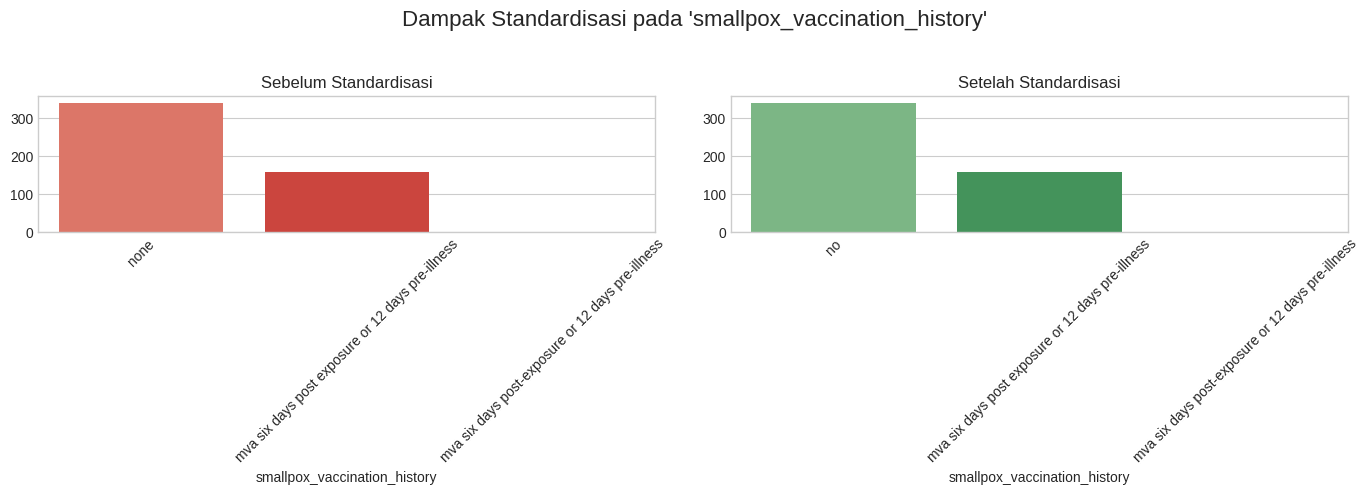


------------------------------------------------------------
🔎 Laporan Detail untuk Kolom: 'hiv_hepatitis_b_and_hepatitis_c_status'
   - Nilai unik berkurang dari 3 menjadi 3.


,Before,After
hiv_hepatitis_b_and_hepatitis_c_status,,
positive,306,0
negative,191,0
not tested (parents negative),3,3
yes,0,306
no,0,191


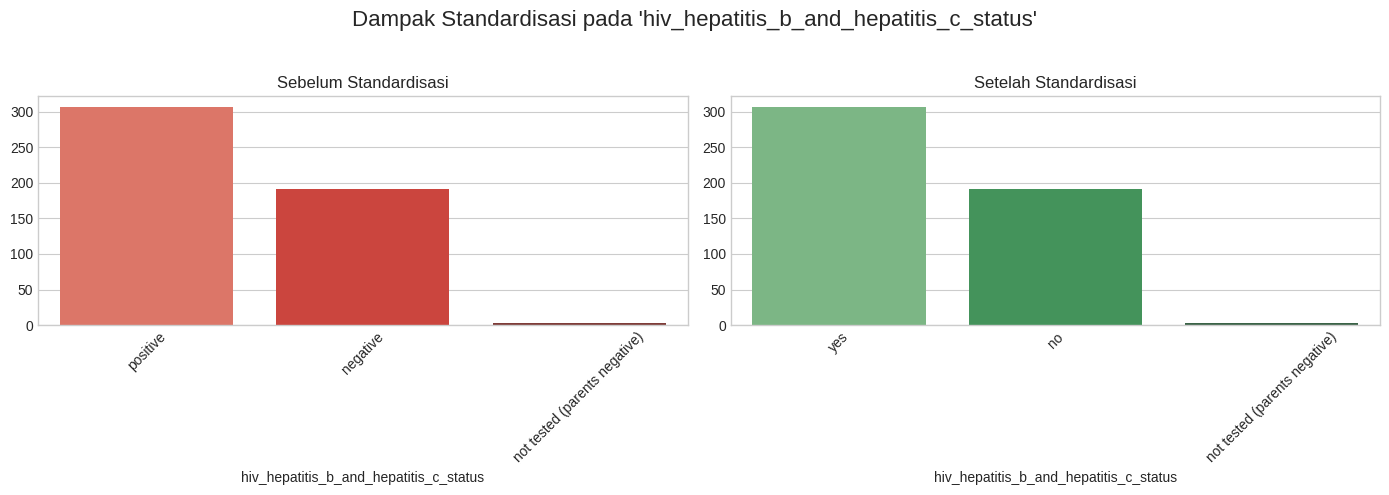


------------------------------------------------------------
🔎 Laporan Detail untuk Kolom: 'rectal_pain_or_pain_on_defecation'
   - Nilai unik berkurang dari 2 menjadi 2.


,Before,After
rectal_pain_or_pain_on_defecation,,
none,321,0
yes,179,179
no,0,321


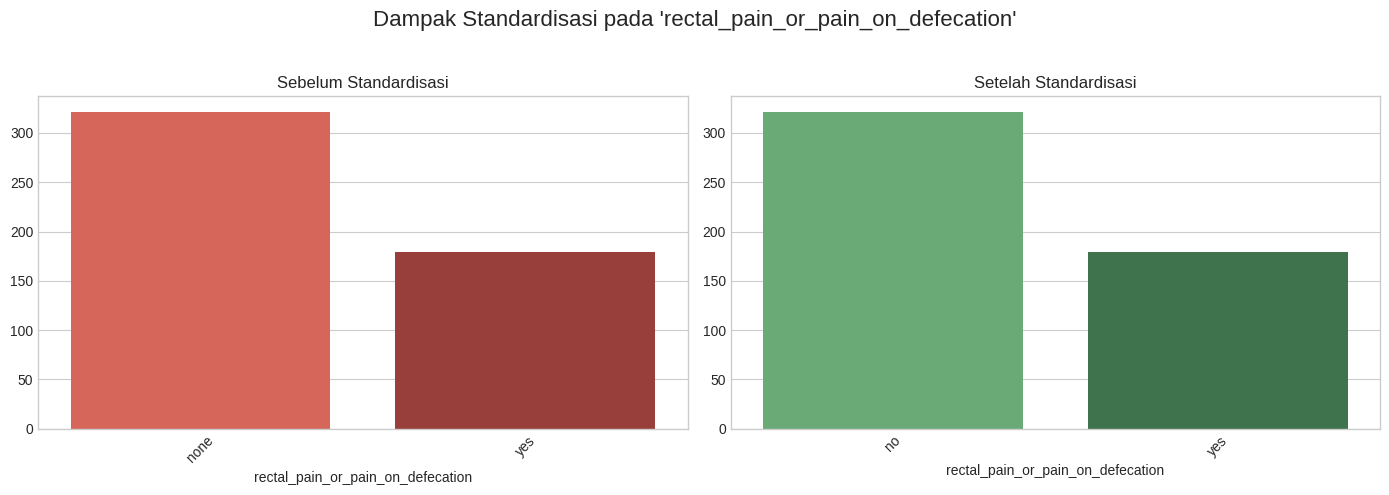


------------------------------------------------------------
🔎 Laporan Detail untuk Kolom: 'dysuria'
   - Nilai unik berkurang dari 2 menjadi 2.


,Before,After
dysuria,,
none,387,0
yes,113,113
no,0,387


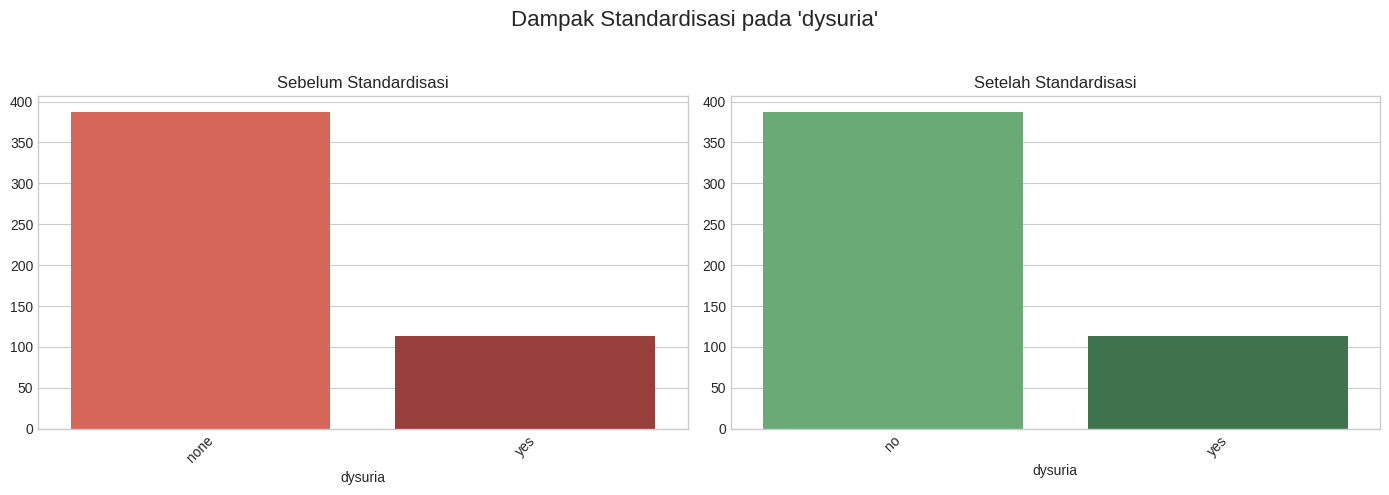


------------------------------------------------------------
🔎 Laporan Detail untuk Kolom: 'bleedingdischarge_per_rectum'
   - Nilai unik berkurang dari 2 menjadi 2.


,Before,After
bleedingdischarge_per_rectum,,
none,451,0
yes,49,49
no,0,451


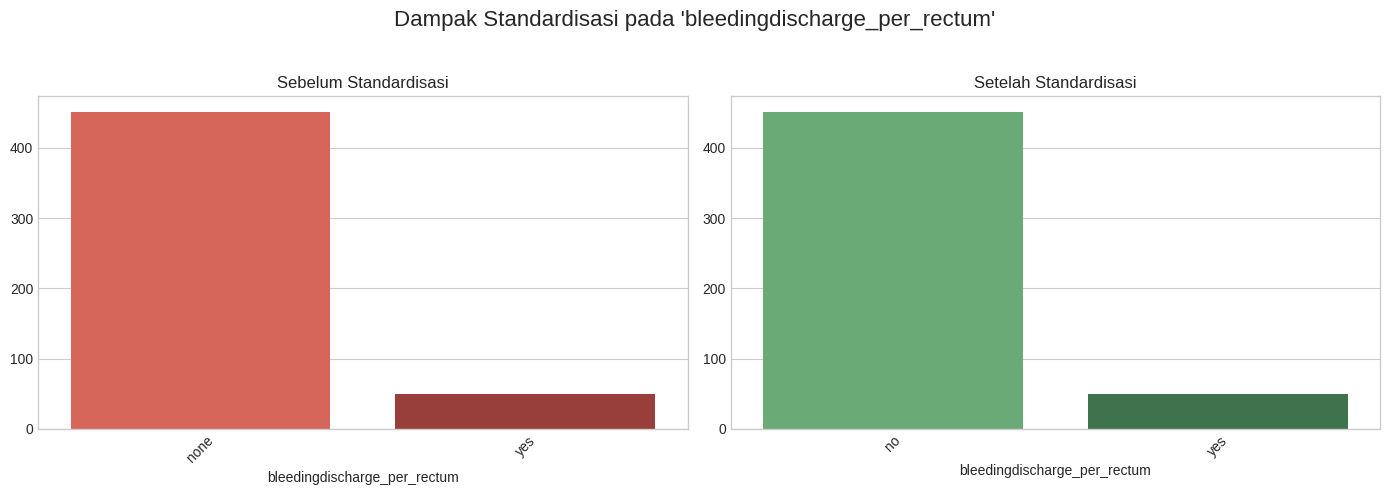


------------------------------------------------------------
🔎 Laporan Detail untuk Kolom: 'conjunctivitis'
   - Nilai unik berkurang dari 2 menjadi 2.


,Before,After
conjunctivitis,,
yes,251,251
none,249,0
no,0,249


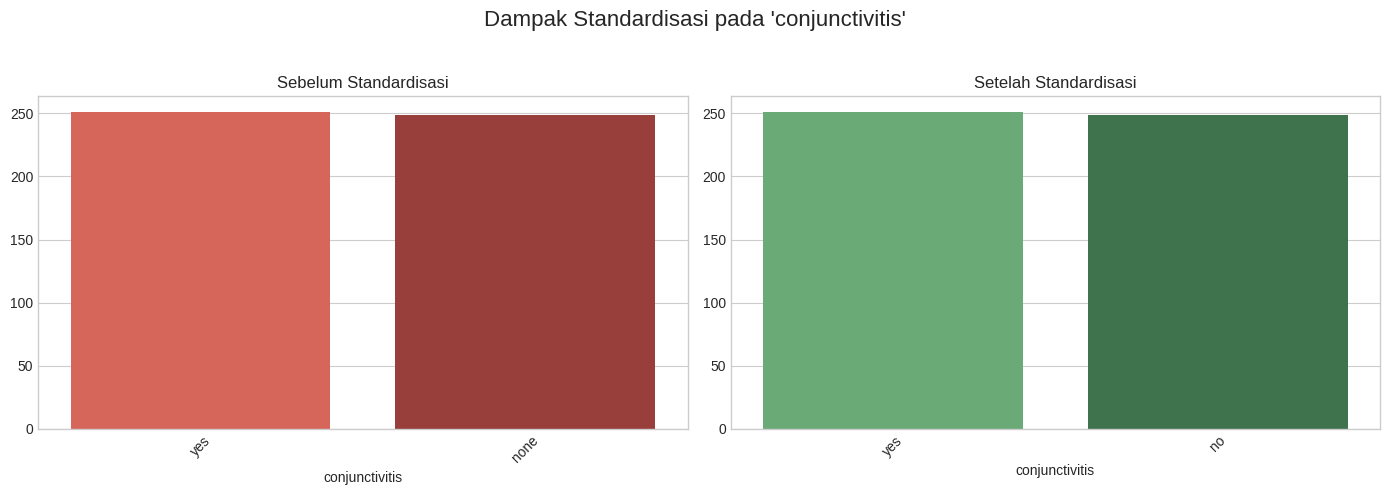


------------------------------------------------------------
🔎 Laporan Detail untuk Kolom: 'back_pain'
   - Nilai unik berkurang dari 2 menjadi 2.


,Before,After
back_pain,,
yes,352,352
none,148,0
no,0,148


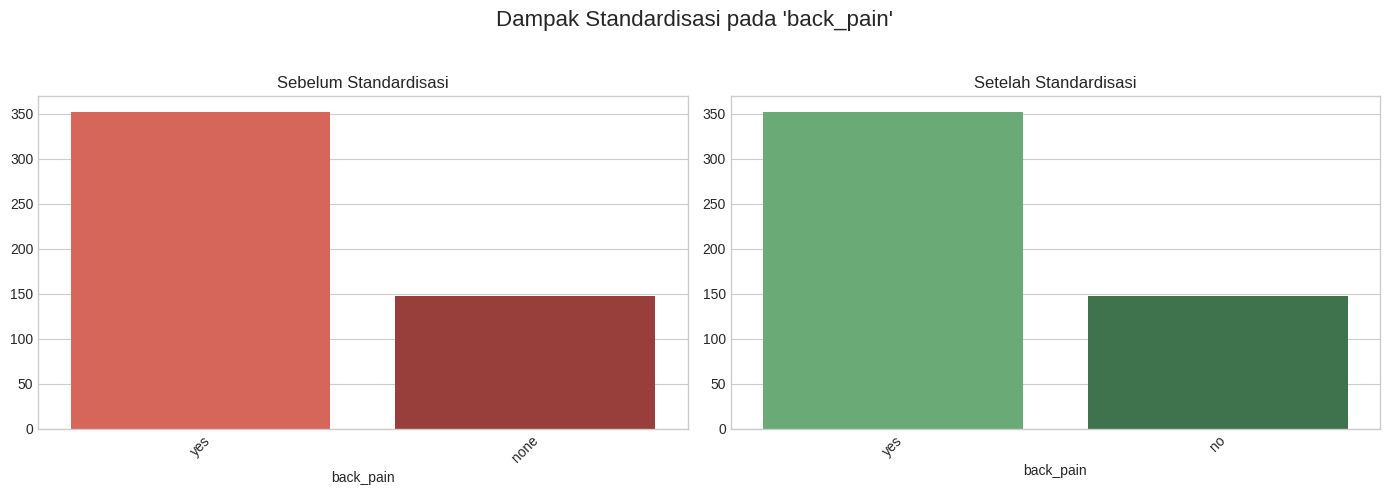


------------------------------------------------------------
🔎 Laporan Detail untuk Kolom: 'myalgia'
   - Nilai unik berkurang dari 2 menjadi 2.


,Before,After
myalgia,,
yes,393,393
none,107,0
no,0,107


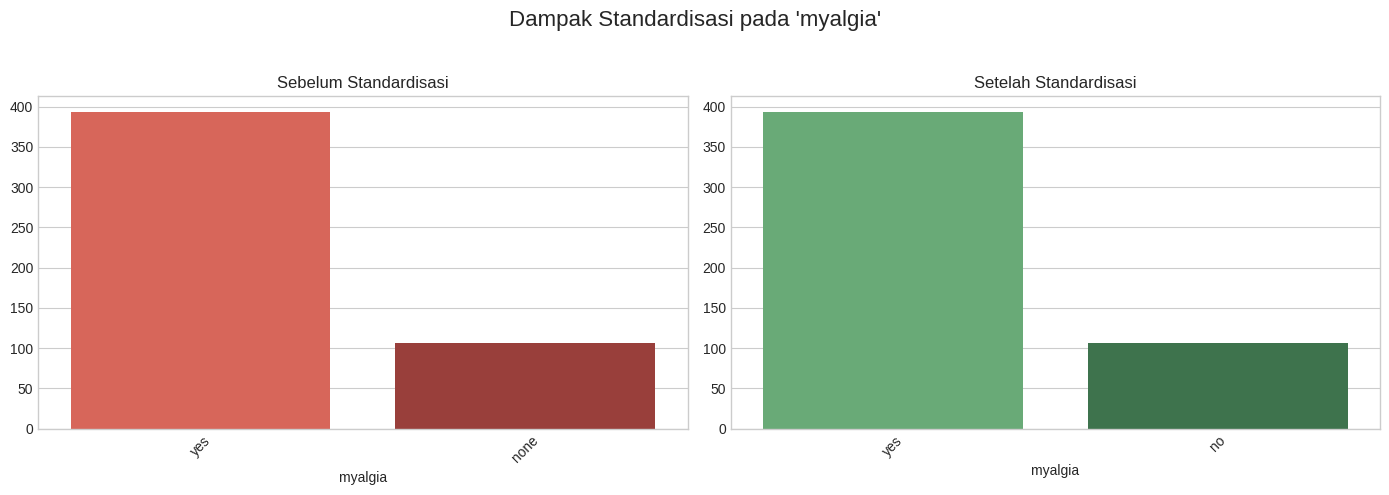


------------------------------------------------------------
🔎 Laporan Detail untuk Kolom: 'headache'
   - Nilai unik berkurang dari 2 menjadi 2.


,Before,After
headache,,
yes,377,377
none,123,0
no,0,123


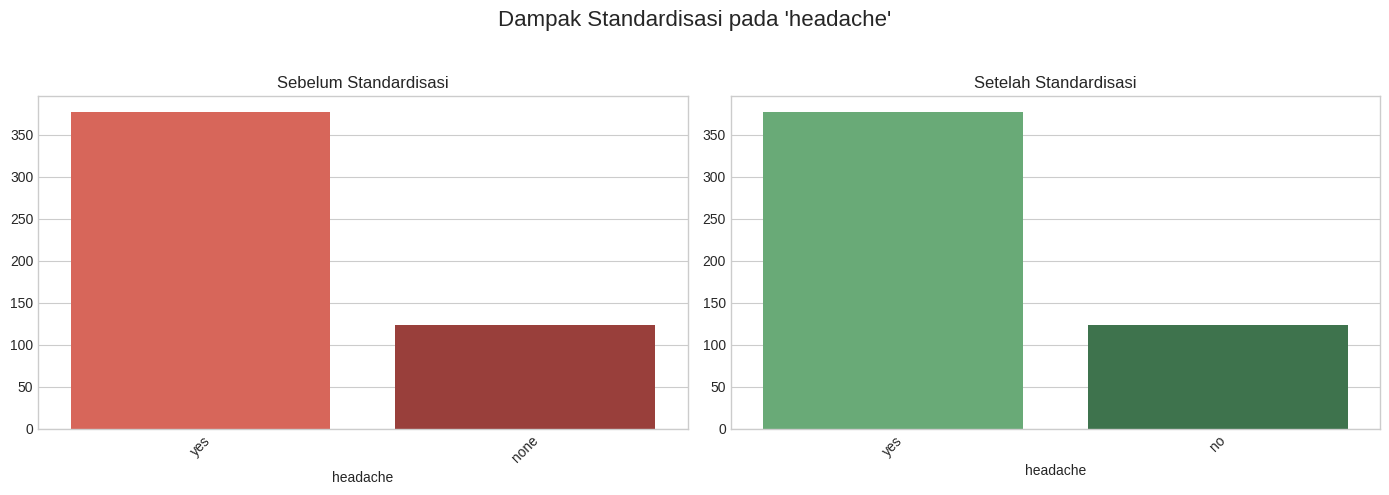


------------------------------------------------------------
🔎 Laporan Detail untuk Kolom: 'lymphadenopathy'
   - Nilai unik berkurang dari 2 menjadi 2.


,Before,After
lymphadenopathy,,
yes,314,314
none,186,0
no,0,186


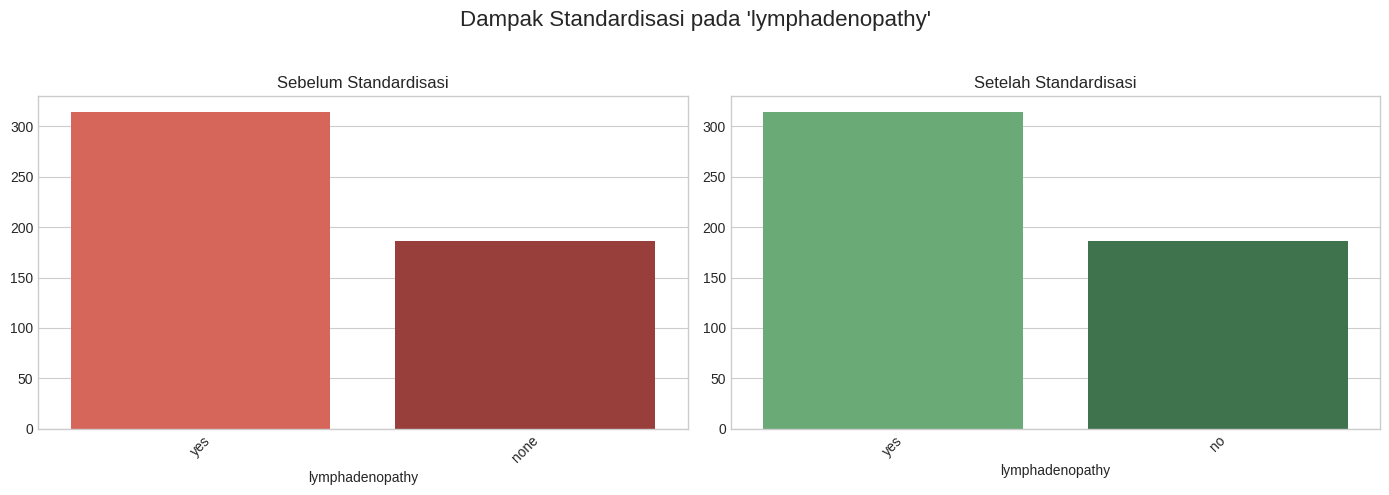


------------------------------------------------------------
🔎 Laporan Detail untuk Kolom: 'complications_of_illness'
   - Nilai unik berkurang dari 7 menjadi 7.


,Before,After
complications_of_illness,,
low mood and emotional lability. ulcerated inguinal lesion with delayed healing,124,124
"deep tissue abscesses, severe pain, and low mood",102,102
"conjunctivitis, painful disruption of thumbnail from subungual lesion",43,43
low mood,15,15
ulcerated inguinal lesion with delayed healing,5,5
pruritis and contact dermatitis from cleaning products,5,5
none,3,0
no,0,3


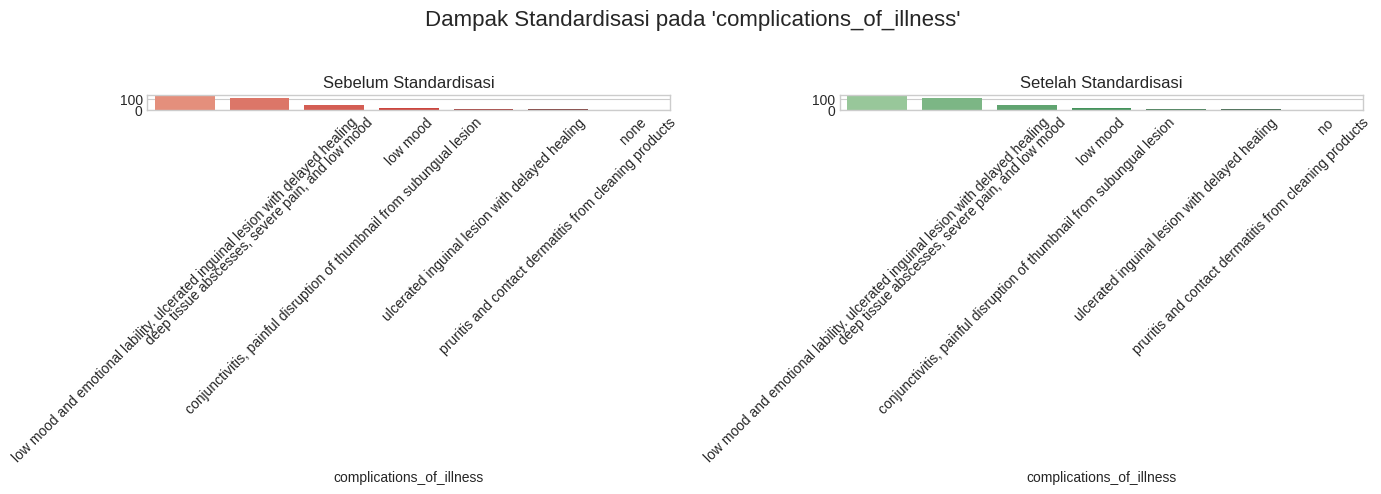


------------------------------------------------------------
🔎 Laporan Detail untuk Kolom: 'monkeypox_viral_dna_detected_in_blood'
   - Nilai unik berkurang dari 2 menjadi 2.


,Before,After
monkeypox_viral_dna_detected_in_blood,,
none,274,0
yes,226,226
no,0,274


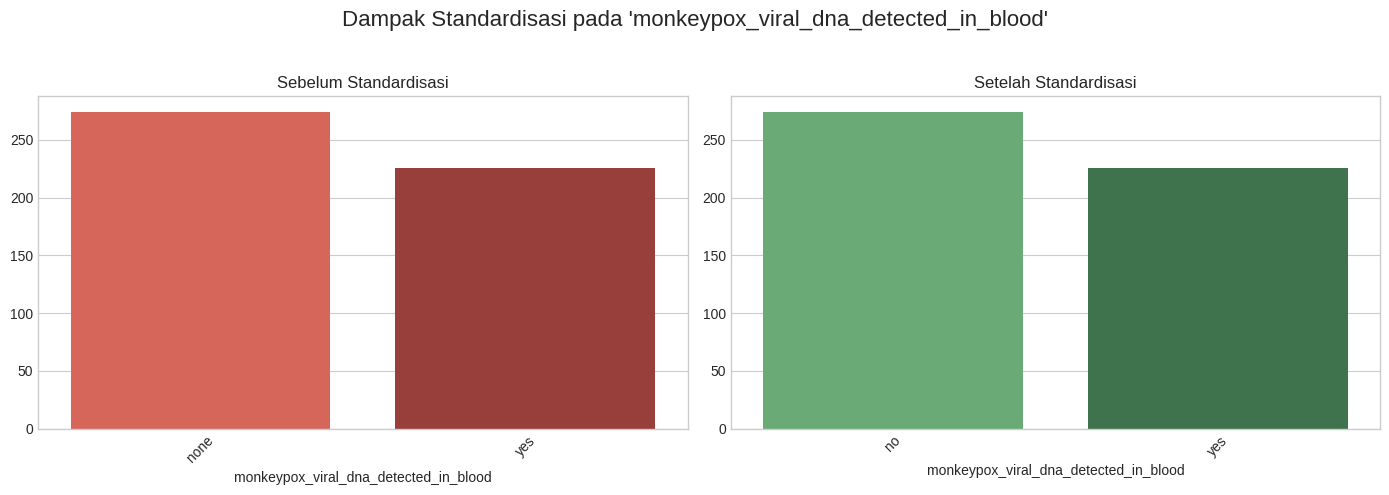


------------------------------------------------------------
🔎 Laporan Detail untuk Kolom: 'monkeypox_viral_dna_detected_in_nose_or_throat_swab'
   - Nilai unik berkurang dari 2 menjadi 2.


,Before,After
monkeypox_viral_dna_detected_in_nose_or_throat_swab,,
yes,434,434
none,66,0
no,0,66


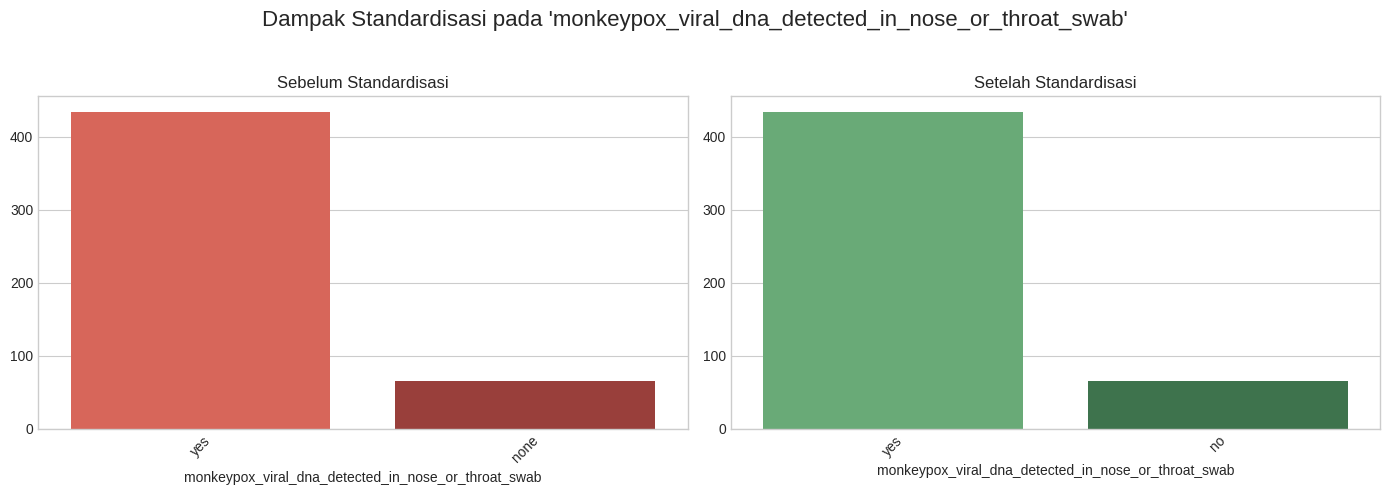


------------------------------------------------------------
🔎 Laporan Detail untuk Kolom: 'monkeypox_viral_dna_detected_in_urine'
   - Nilai unik berkurang dari 2 menjadi 2.


,Before,After
monkeypox_viral_dna_detected_in_urine,,
yes,405,405
none,95,0
no,0,95


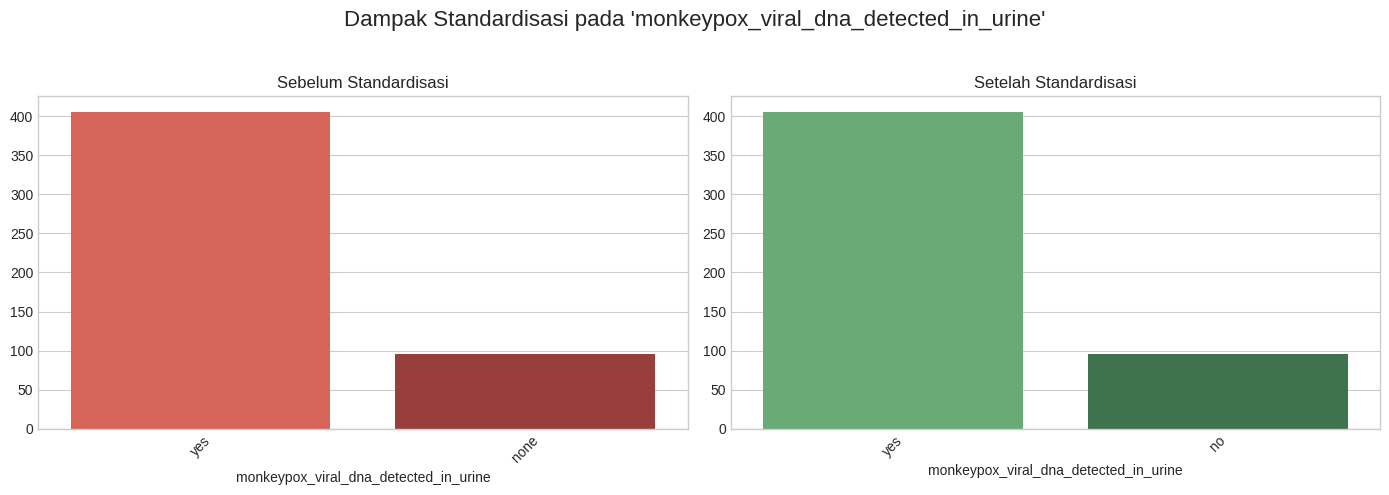


------------------------------------------------------------
🔎 Laporan Detail untuk Kolom: 'antivirals_received'
   - Nilai unik berkurang dari 5 menjadi 5.


,Before,After
antivirals_received,,
brincidofovir 200 mg (three dose) orally,147,147
brincidofovir 200 mg (two dose) orally,140,140
brincidofovir 200 mg (one dose) orally,124,124
none,72,0
tecovirimat 600 mg twice daily for 2 weeks orally,17,17
no,0,72


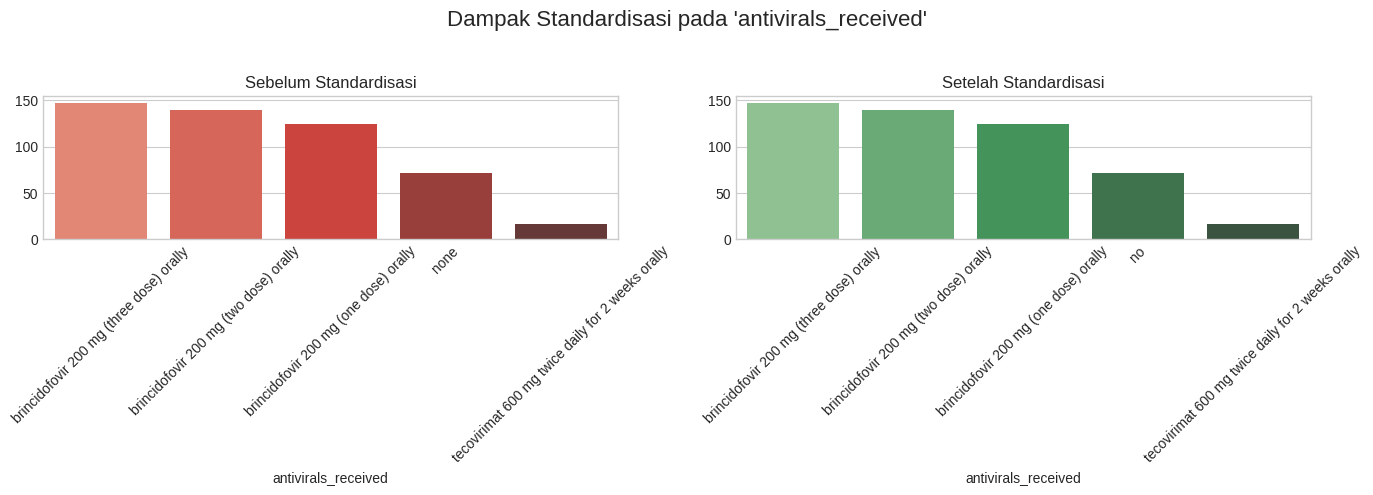


------------------------------------------------------------
🔎 Laporan Detail untuk Kolom: 'complications_of_treatment'
   - Nilai unik berkurang dari 4 menjadi 4.


,Before,After
complications_of_treatment,,
none,235,0
transaminitis (peak alt 331 u/l),122,122
"transaminitis (peak alt 127 u/l), nausea, and abdominal discomfort",103,103
transaminitis (peak alt 550 u/l),40,40
no,0,235


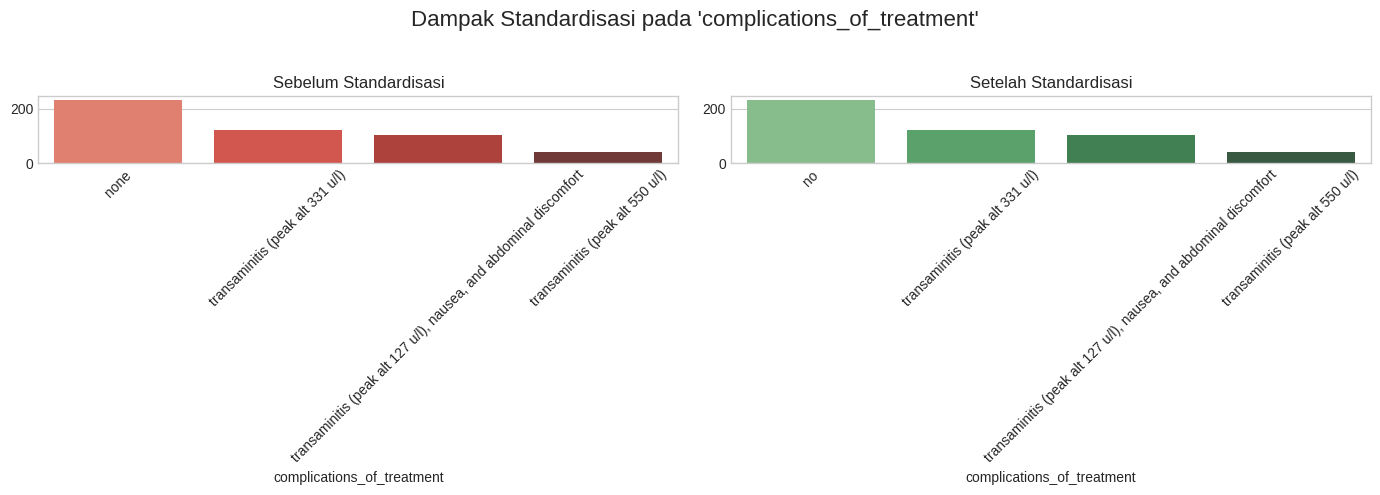


------------------------------------------------------------
🔎 Laporan Detail untuk Kolom: 'sore_throat'
   - Nilai unik berkurang dari 2 menjadi 2.


,Before,After
sore_throat,,
yes,358,358
none,142,0
no,0,142


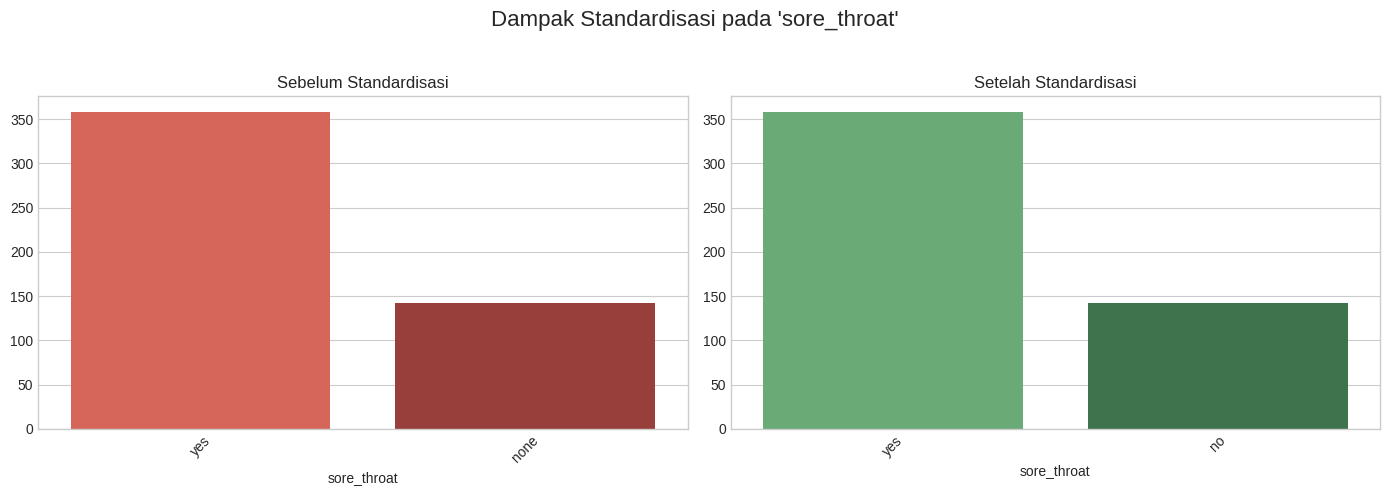


------------------------------------------------------------
🔎 Laporan Detail untuk Kolom: 'chills'
   - Nilai unik berkurang dari 2 menjadi 2.


,Before,After
chills,,
none,360,0
yes,140,140
no,0,360


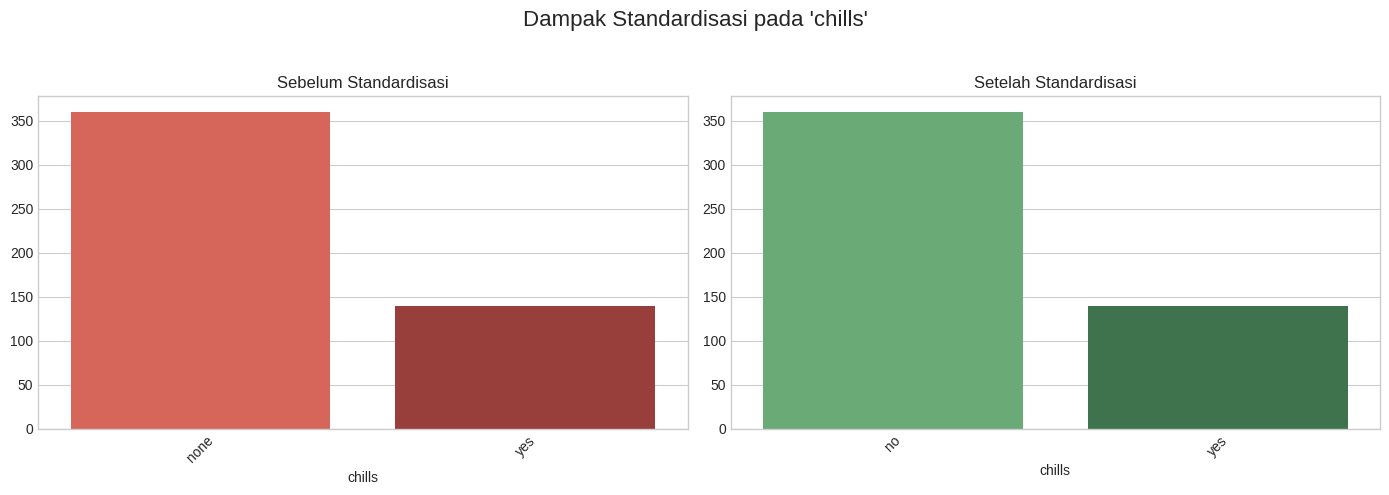


------------------------------------------------------------
🔎 Laporan Detail untuk Kolom: 'diagnosing'
   - Nilai unik berkurang dari 2 menjadi 2.


,Before,After
diagnosing,,
positive,297,0
negative,203,0
yes,0,297
no,0,203


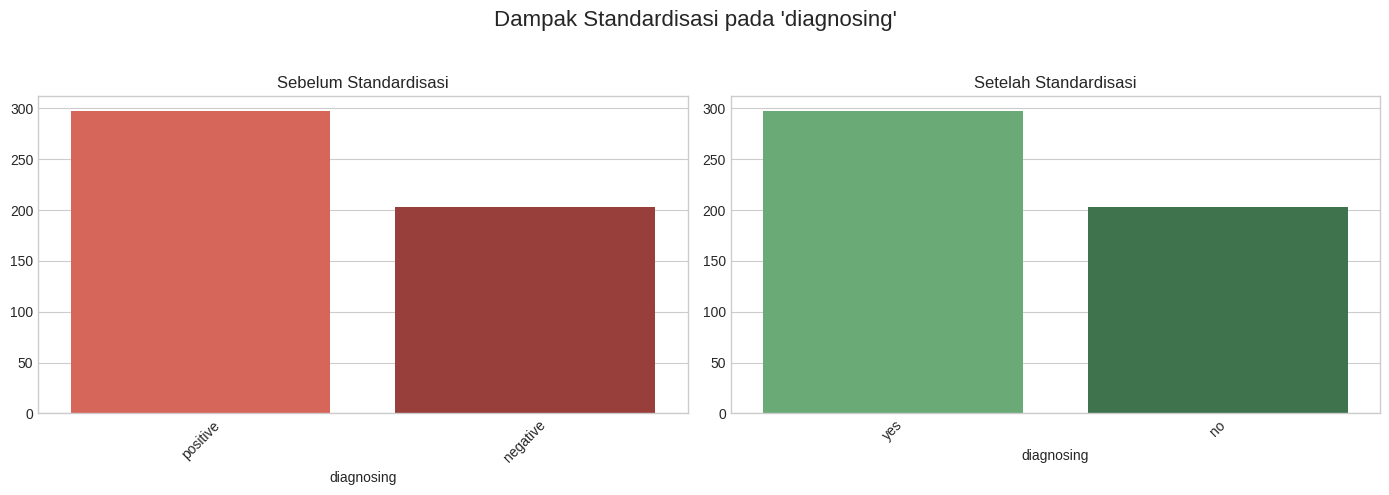


📊 Final Overview after Pre-Processing:
   - Data shape: (500, 50)


,age,sex,transmission_rank,country_of_acquisition,smallpox_vaccination_history,hiv_hepatitis_b_and_hepatitis_c_status,rectal_pain_or_pain_on_defecation,dysuria,bleedingdischarge_per_rectum,conjunctivitis,oropharyngeal_manifestations,back_pain,myalgia,headache,sexually_transmitted_infections,lymphadenopathy,approximate_maximum_number_of_concurrent_lesions,distribution_of_lesions,complications_of_illness,monkeypox_viral_dna_detected_in_blood,monkeypox_viral_dna_detected_in_nose_or_throat_swab,monkeypox_viral_dna_detected_in_urine,antivirals_received,day_of_illness_treatment_commenced,complications_of_treatment,duration_of_hospitalization_with_monkeypox_days,sore_throat,chills,wbc_count_cellsmm3_normaladult_range__40009000,hematocrit_normal_3949_for_men_and3545_for_women,platelet_count_109_plateletsl___normal_adult_range_150400,sodium_level_mmoll__normal_adult_range__136__145,potassium_level_mmoll_normal_adult_range_35__50,blood_urea_nitrogen_level_mgdl_normal_adult_range__1020,creatinine_level_mgdl_normal_adult_range__15_,calcium_level_mmoll_normal_adult_range__9_105,total_bilirubin_level_mgdl__normal_adult_range__03_1_,ast_level_ul_normal_adult_range_035,alt_level_ul_normal_adult_range__035,alp_level_ul_normal_adult_range_40140,arthralgia_67_to_158,albumin_level_mgdl_normal_adult_range_35__55,hospitalized,date_confirmation,rtpcr,outcome_of_monkeypox_infection,diagnosing,diagnosed_disease,fever_presence,fever_duration_days
0,49,female,isolated,nigeria,no,no,yes,no,no,yes,tonsillar erythema,no,yes,yes,rectum,yes,150,"face, scalp, trunk, limbs, palms, glans penis,...",low mood and emotional lability. ulcerated ing...,yes,yes,yes,brincidofovir 200 mg (one dose) orally,7,transaminitis (peak alt 331 u/l),26,yes,yes,22135,48,109,129,2.4,8.4,2.2,8.2,1.0,41,37,147,10.0,2.5,yes,5/6/2022,yes,full recovery,yes,monkeypox,yes,2
1,52,female,index,spain,no,yes,no,yes,no,yes,abscess,yes,no,no,purulent penile discharge.,no,40,"face, trunk, arms, and legs","deep tissue abscesses, severe pain, and low mood",no,no,yes,no,7,"transaminitis (peak alt 127 u/l), nausea, and ...",15,yes,no,14026,48,138,131,1.9,8.4,1.8,7.3,1.1,42,37,145,9.8,1.9,yes,8/31/2022,no,full recovery,yes,monkeypox,yes,1
2,76,male,index,nigeria,no,no,yes,no,yes,yes,pustules,yes,yes,no,throat,yes,100,"face, trunk, limbs, palms, soles, and scrotum","deep tissue abscesses, severe pain, and low mood",yes,yes,yes,brincidofovir 200 mg (two dose) orally,6,transaminitis (peak alt 550 u/l),27,yes,no,26742,56,131,117,2.9,8.3,1.5,6.1,1.0,38,42,149,11.0,2.8,yes,5/12/2022,yes,full recovery,yes,monkeypox,yes,4
3,42,female,secondary,nigeria,mva six days post-exposure or 12 days pre-illness,yes,no,yes,no,no,oedema,yes,no,yes,urethra/urine,no,32,"face, trunk, hands (including nail bed), and l...","conjunctivitis, painful disruption of thumbnai...",yes,yes,yes,brincidofovir 200 mg (two dose) orally,7,"transaminitis (peak alt 127 u/l), nausea, and ...",35,yes,no,24688,49,115,126,2.4,7.8,1.7,8.3,1.6,43,41,143,6.6,2.0,yes,8/13/2022,yes,full recovery,yes,monkeypox,yes,1
4,67,male,isolated,nigeria,no,no,no,yes,no,yes,abscess,no,yes,no,multiple site,yes,100,"face, scalp, trunk, limbs, penile shaft, palms...",ulcerated inguinal lesion with delayed healing,yes,yes,yes,brincidofovir 200 mg (two dose) orally,7,no,39,yes,yes,20346,52,144,126,3.3,7.9,1.8,7.7,1.4,43,38,143,7.0,2.7,yes,5/15/2022,no,full recovery,yes,monkeypox,yes,2



🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
FINALIZING STEP 2: SEPARATING FEATURES (X) AND TARGET (y)
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
   - Target (y) ditetapkan sebagai: 'diagnosing'

   - X_initial shape: (500, 49)
   - y_initial shape: (500,)

✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅
STEP 2: GLOBAL PRE-PROCESSING COMPLETED! DATA IS READY FOR SPLITTING.
✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅


In [2]:
# =============================================================================
# STEP 2: DATA LOADING & GLOBAL PRE-PROCESSING (COMPREHENSIVE STANDARDIZATION)
# =============================================================================
import pandas as pd
import numpy as np
import sys
import re
import chardet
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

# --- Pastikan modul Colab dikenali ---
if 'google.colab' in sys.modules:
    from google.colab import files

# === 2.1 LOADER CLASS ===
class EnhancedCSVLoader:
    """Loader CSV yang sudah disederhanakan dan lebih tangguh."""
    def load_csv(self, file_path):
        print(f"🔄 Loading CSV: '{file_path}'...")
        encoding = 'utf-8'
        try:
            with open(file_path, 'rb') as f:
                encoding = chardet.detect(f.read(30000))['encoding']
        except Exception:
            print("   - Warning: Gagal deteksi encoding, default ke utf-8.")
        try:
            df = pd.read_csv(file_path, encoding=encoding)
            print(f"✅ Berhasil load. Bentuk awal: {df.shape}")
            return df
        except Exception:
            try:
                print(f"   - Gagal dengan encoding '{encoding}', mencoba fallback 'latin1'...")
                df = pd.read_csv(file_path, encoding='latin1')
                print(f"✅ Berhasil load dengan fallback 'latin1'. Bentuk awal: {df.shape}")
                return df
            except Exception as e2:
                print(f"❌ Gagal load: {e2}"); return None

# === 2.2 PRE-PROCESSING CLASS WITH ENHANCED STANDARDIZATION ===
class DataPreparer:
    """
    Melakukan semua persiapan data yang aman dilakukan SEBELUM data dipisah (splitting),
    dengan logika standardisasi dan rekayasa fitur yang komprehensif.
    """
    def __init__(self, df):
        self.df = df.copy()
        self.report_data = []

    def run(self):
        print("\n" + "🧼"*40 + "\nGLOBAL DATA PRE-PROCESSING (PRE-SPLIT)\n" + "🧼"*40)
        self._initial_cleaning()
        self._standardize_values()
        self._generate_report_and_visuals()
        print("\n📊 Final Overview after Pre-Processing:")
        print(f"   - Data shape: {self.df.shape}")
        display(self.df.head())
        return self.df

    def _initial_cleaning(self):
        print("--- 1. Pembersihan Awal (Nama Kolom & Duplikat) ---")
        cleaned_columns = {col: re.sub(r'[^a-z0-9_]', '', col.strip().lower().replace(' ', '_')) for col in self.df.columns}
        self.df.rename(columns=cleaned_columns, inplace=True)
        id_cols = ['id', 'patient_id']
        self.df.drop(columns=[c for c in id_cols if c in self.df.columns], inplace=True, errors='ignore')
        n_dupes = self.df.duplicated().sum()
        self.df.drop_duplicates(keep='first', inplace=True)
        print(f"✅ Nama kolom dibersihkan dan {n_dupes} duplikat dihapus.")

    def _standardize_values(self):
        print("\n--- 2. Standardisasi Nilai Komprehensif ---")

        # --- Bagian A: Penanganan Kasus Khusus (contoh: 'fever') ---
        print("   - Menangani kasus khusus seperti 'fever'...")
        if 'fever' in self.df.columns:
            # Buat kolom baru untuk keberadaan dan durasi demam
            self.df['fever_presence'] = 'no'
            self.df['fever_duration_days'] = 0

            # Ubah nilai 'fever' menjadi string lowercase untuk konsistensi
            fever_series = self.df['fever'].astype(str).str.lower()

            # Tentukan keberadaan demam
            self.df.loc[fever_series.str.contains('yes|coryzal', na=False), 'fever_presence'] = 'yes'

            # Ekstrak durasi demam menggunakan regular expression
            # \d+ cocok dengan satu atau lebih digit (angka)
            durations = fever_series.str.extract(r'\((\d+)\s*day').astype(float)
            self.df['fever_duration_days'] = durations[0]

            # Isi NaN di durasi: jika demam ada tapi tidak ada durasi, anggap 1 hari. Jika tidak, 0.
            self.df['fever_duration_days'] = self.df.apply(
                lambda row: 1 if pd.isna(row['fever_duration_days']) and row['fever_presence'] == 'yes' else row['fever_duration_days'],
                axis=1
            ).fillna(0).astype(int)

            # Hapus kolom 'fever' asli
            self.df.drop(columns=['fever'], inplace=True)
            print("     ✅ Fitur 'fever' diubah menjadi 'fever_presence' dan 'fever_duration_days'.")

        # --- Bagian B: Standardisasi Nilai Umum ---
        print("   - Menerapkan aturan standardisasi umum ('y' -> 'yes', 'none' -> 'no', dll.)...")
        for col in self.df.select_dtypes(include='object').columns:
            self.df[col] = self.df[col].str.lower().str.strip()

        replace_map = {
            'y': 'yes', 'true': 'yes', '1': 'yes', 'positive': 'yes', 'present': 'yes', 'detected': 'yes',
            'n': 'no', 'false': 'no', '0': 'no', 'negative': 'no', 'absent': 'no', 'not detected': 'no', 'none': 'no',
            'm': 'male', 'man': 'male', 'f': 'female', 'woman': 'female',
            'na': 'unknown', 'n/a': 'unknown', 'not specified': 'unknown', '?': 'unknown'
        }

        # Lakukan pelaporan sebelum replace
        categorical_cols = self.df.select_dtypes(include=['object', 'category']).columns
        for col in categorical_cols:
            before_counts = self.df[col].value_counts()
            # Terapkan replace hanya untuk kolom yang sedang diiterasi
            self.df[col] = self.df[col].replace(replace_map)
            after_counts = self.df[col].value_counts()
            if not before_counts.equals(after_counts):
                self.report_data.append({
                    'column': col, 'before_counts': before_counts, 'after_counts': after_counts,
                    'unique_before': len(before_counts), 'unique_after': len(after_counts)
                })
        print("✅ Proses standardisasi nilai selesai.")

    def _generate_report_and_visuals(self):
        # (Fungsi laporan ini tetap sama seperti sebelumnya, tidak perlu diubah)
        print("\n" + "📋"*40); print("LAPORAN KOMPREHENSIF STANDARDIZASI NILAI"); print("📋"*40)
        if not self.report_data:
            print("✅ Tidak ada nilai yang memerlukan standardisasi. Semua data kategorikal sudah bersih.")
            return
        print(f"Ditemukan {len(self.report_data)} kolom dengan nilai yang berhasil distandardisasi.")
        for report in self.report_data:
            col, before_df, after_df = report['column'], report['before_counts'].to_frame('Before'), report['after_counts'].to_frame('After')
            comparison_df = pd.concat([before_df, after_df], axis=1).fillna(0).astype(int)
            print("\n" + "-"*60); print(f"🔎 Laporan Detail untuk Kolom: '{col}'"); print(f"   - Nilai unik berkurang dari {report['unique_before']} menjadi {report['unique_after']}.")
            display(comparison_df)
            fig, axes = plt.subplots(1, 2, figsize=(14, 5)); fig.suptitle(f"Dampak Standardisasi pada '{col}'", fontsize=16)
            sns.barplot(x=report['before_counts'].index, y=report['before_counts'].values, ax=axes[0], palette='Reds_d'); axes[0].set_title("Sebelum Standardisasi"); axes[0].tick_params(axis='x', rotation=45)
            sns.barplot(x=report['after_counts'].index, y=report['after_counts'].values, ax=axes[1], palette='Greens_d'); axes[1].set_title("Setelah Standardisasi"); axes[1].tick_params(axis='x', rotation=45)
            plt.tight_layout(rect=[0, 0, 1, 0.95]); plt.show()

# =============================================================================
# MAIN FUNCTION & EXECUTION
# =============================================================================
def main_data_loader_and_preparer():
    print("🚀 Memulai Pipeline Data Loading & Global Pre-Processing..."); print("="*80)
    df = None
    if 'google.colab' in sys.modules:
        try:
            print("\n📤 Silakan upload CSV Anda..."); uploaded = files.upload()
            if not uploaded: print("🚫 Tidak ada file diupload."); return None
            file_name = next(iter(uploaded))
            df = EnhancedCSVLoader().load_csv(file_name)
        except Exception as e: print(f"💥 Error saat upload: {e}"); return None
    else:
        file_name = 'MonkeyPox Dataset Skripsi.csv'
        df = EnhancedCSVLoader().load_csv(file_name)

    if df is not None:
        if "Monkeypox" in df.columns:
            df.rename(columns={"Monkeypox": "diagnosing"}, inplace=True)
        return DataPreparer(df).run()
    return None

# --- Jalankan pipeline utama ---
df_prepared = main_data_loader_and_preparer()

# =============================================================================
# PEMISAHAN FITUR & TARGET (untuk input ke Step 3)
# =============================================================================
if df_prepared is not None:
    print("\n" + "🎯"*40); print("FINALIZING STEP 2: SEPARATING FEATURES (X) AND TARGET (y)"); print("🎯"*40)
    TARGET_COLUMN = 'diagnosing'
    if TARGET_COLUMN in df_prepared.columns:
        X_initial = df_prepared.drop(columns=[TARGET_COLUMN], errors='ignore')
        y_initial = df_prepared[TARGET_COLUMN]
        print(f"   - Target (y) ditetapkan sebagai: '{TARGET_COLUMN}'")
        print(f"\n   - X_initial shape: {X_initial.shape}"); print(f"   - y_initial shape: {y_initial.shape}")
        print("\n" + "✅"*60); print("STEP 2: GLOBAL PRE-PROCESSING COMPLETED! DATA IS READY FOR SPLITTING."); print("✅"*60)
    else:
        print(f"🛑 GAGAL: Kolom target '{TARGET_COLUMN}' tidak ditemukan.")
else:
    print("\n" + "🛑"*60); print("STEP 2 FAILED. Periksa error di atas."); print("🛑"*60)

In [3]:
# Menampilkan 10 baris pertama dari tabel fitur (X_initial)
display(X_initial.head(10))

# Menampilkan 10 baris pertama dari tabel target (y_initial)
display(y_initial.head(10))

,age,sex,transmission_rank,country_of_acquisition,smallpox_vaccination_history,hiv_hepatitis_b_and_hepatitis_c_status,rectal_pain_or_pain_on_defecation,dysuria,bleedingdischarge_per_rectum,conjunctivitis,oropharyngeal_manifestations,back_pain,myalgia,headache,sexually_transmitted_infections,lymphadenopathy,approximate_maximum_number_of_concurrent_lesions,distribution_of_lesions,complications_of_illness,monkeypox_viral_dna_detected_in_blood,monkeypox_viral_dna_detected_in_nose_or_throat_swab,monkeypox_viral_dna_detected_in_urine,antivirals_received,day_of_illness_treatment_commenced,complications_of_treatment,duration_of_hospitalization_with_monkeypox_days,sore_throat,chills,wbc_count_cellsmm3_normaladult_range__40009000,hematocrit_normal_3949_for_men_and3545_for_women,platelet_count_109_plateletsl___normal_adult_range_150400,sodium_level_mmoll__normal_adult_range__136__145,potassium_level_mmoll_normal_adult_range_35__50,blood_urea_nitrogen_level_mgdl_normal_adult_range__1020,creatinine_level_mgdl_normal_adult_range__15_,calcium_level_mmoll_normal_adult_range__9_105,total_bilirubin_level_mgdl__normal_adult_range__03_1_,ast_level_ul_normal_adult_range_035,alt_level_ul_normal_adult_range__035,alp_level_ul_normal_adult_range_40140,arthralgia_67_to_158,albumin_level_mgdl_normal_adult_range_35__55,hospitalized,date_confirmation,rtpcr,outcome_of_monkeypox_infection,diagnosed_disease,fever_presence,fever_duration_days
0,49,female,isolated,nigeria,no,no,yes,no,no,yes,tonsillar erythema,no,yes,yes,rectum,yes,150,"face, scalp, trunk, limbs, palms, glans penis,...",low mood and emotional lability. ulcerated ing...,yes,yes,yes,brincidofovir 200 mg (one dose) orally,7,transaminitis (peak alt 331 u/l),26,yes,yes,22135,48,109,129,2.4,8.4,2.2,8.20,1.0,41,37,147,10.0,2.5,yes,5/6/2022,yes,full recovery,monkeypox,yes,2
1,52,female,index,spain,no,yes,no,yes,no,yes,abscess,yes,no,no,purulent penile discharge.,no,40,"face, trunk, arms, and legs","deep tissue abscesses, severe pain, and low mood",no,no,yes,no,7,"transaminitis (peak alt 127 u/l), nausea, and ...",15,yes,no,14026,48,138,131,1.9,8.4,1.8,7.30,1.1,42,37,145,9.8,1.9,yes,8/31/2022,no,full recovery,monkeypox,yes,1
2,76,male,index,nigeria,no,no,yes,no,yes,yes,pustules,yes,yes,no,throat,yes,100,"face, trunk, limbs, palms, soles, and scrotum","deep tissue abscesses, severe pain, and low mood",yes,yes,yes,brincidofovir 200 mg (two dose) orally,6,transaminitis (peak alt 550 u/l),27,yes,no,26742,56,131,117,2.9,8.3,1.5,6.10,1.0,38,42,149,11.0,2.8,yes,5/12/2022,yes,full recovery,monkeypox,yes,4
3,42,female,secondary,nigeria,mva six days post-exposure or 12 days pre-illness,yes,no,yes,no,no,oedema,yes,no,yes,urethra/urine,no,32,"face, trunk, hands (including nail bed), and l...","conjunctivitis, painful disruption of thumbnai...",yes,yes,yes,brincidofovir 200 mg (two dose) orally,7,"transaminitis (peak alt 127 u/l), nausea, and ...",35,yes,no,24688,49,115,126,2.4,7.8,1.7,8.30,1.6,43,41,143,6.6,2.0,yes,8/13/2022,yes,full recovery,monkeypox,yes,1
4,67,male,isolated,nigeria,no,no,no,yes,no,yes,abscess,no,yes,no,multiple site,yes,100,"face, scalp, trunk, limbs, penile shaft, palms...",ulcerated inguinal lesion with delayed healing,yes,yes,yes,brincidofovir 200 mg (two dose) orally,7,no,39,yes,yes,20346,52,144,126,3.3,7.9,1.8,7.70,1.4,43,38,143,7.0,2.7,yes,5/15/2022,no,full recovery,monkeypox,yes,2
5,74,female,index,uk,no,no,no,yes,no,no,tonsillar erythema,yes,yes,yes,throat,yes,40,"face, trunk, limbs, palms, and penile shaft",no,no,yes,no,no,10,no,13,no,yes,21414,48,123,110,3.1,7.6,1.6,8.80,1.8,43,39,141,7.6,2.9,yes,5/15/2022,yes,full recovery,monkeypox,no,0
6,78,male,tertiary,nigeria,no,not tested (parents negative),no,no,yes,yes,pustules,yes,yes,no,unknown,yes,30,"face, trunk, arms, and legs",pruritis and contact dermatitis from cleaning ...,yes,yes,no,no,4,no,22,yes,no,14649,58,131,130,2.9,7.7,2.1,8.50,1.2,39,38,141,6.8,2.7,yes,6/19/2022,no,full recovery,monkeypox,no,0
7,44,female,secondary,spain,no,n

,diagnosing
0,yes
1,yes
2,yes
3,yes
4,yes
5,yes
6,yes
7,yes
8,yes
9,no


In [4]:
# =============================================================================
# STEP 3: DATA SPLITTING (TRAIN/VALIDATION & TEST SETS)
# =============================================================================
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

def split_data_for_cv(X, y, test_size=0.20, random_state=42):
    """
    Membagi data menjadi dua set utama:
    1. Training/Validation Set (akan digunakan untuk Cross-Validation)
    2. Test Set (untuk evaluasi akhir)

    Menggunakan stratifikasi untuk menjaga proporsi kelas target.
    """
    print("\n" + "🔪"*40)
    print("STEP 3: SPLITTING DATA INTO TRAIN/VALIDATION (80%) & TEST (20%) SETS")
    print("🔪"*40)

    # Lakukan pembagian data satu kali saja
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,      # Menetapkan 20% data untuk testing
        random_state=random_state,  # Seed untuk hasil yang konsisten
        stratify=y                # Sangat penting untuk menjaga proporsi kelas target
    )

    print("✅ Pembagian data berhasil.")
    print("\n" + "-"*40)
    print("Bentuk Data:")
    print(f"  - Training/CV Set (X_train, y_train): {X_train.shape}, {y_train.shape}  (~{1-test_size:.0%})")
    print(f"  - Test Set        (X_test, y_test):   {X_test.shape}, {y_test.shape}  (~{test_size:.0%})")
    print("-"*40)

    # Verifikasi stratifikasi
    print("\nCek Distribusi Target:")
    print(f"  - Original:   \n{y.value_counts(normalize=True).sort_index().to_string()}")
    print(f"  - Training Set: \n{y_train.value_counts(normalize=True).sort_index().to_string()}")
    print(f"  - Test Set:     \n{y_test.value_counts(normalize=True).sort_index().to_string()}")

    return X_train, X_test, y_train, y_test

# =============================================================================
# EKSEKUSI STEP 3
# =============================================================================
if 'X_initial' in locals() and 'y_initial' in locals():
    # Panggil fungsi baru dengan rasio 80/20
    X_train, X_test, y_train, y_test = split_data_for_cv(
        X_initial, y_initial, test_size=0.20, random_state=123 # Ganti random_state ke 123 agar konsisten
    )

    # Hapus variabel yang tidak lagi digunakan untuk kebersihan
    # del X_validation, y_validation # Baris ini tidak diperlukan lagi karena variabel tidak dibuat

    print("\n" + "🎉"*60)
    print("STEP 3 BERHASIL: Data telah dibagi menjadi dua set utama.")
    print("Selanjutnya, X_train akan diproses menggunakan Cross-Validation, dan X_test untuk evaluasi akhir.")
    print("="*80)
else:
    print("🛑 Gagal menjalankan Step 3 karena `X_initial` dan `y_initial` dari Step 2 tidak ditemukan.")


🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪
STEP 3: SPLITTING DATA INTO TRAIN/VALIDATION (80%) & TEST (20%) SETS
🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪
✅ Pembagian data berhasil.

----------------------------------------
Bentuk Data:
  - Training/CV Set (X_train, y_train): (400, 49), (400,)  (~80%)
  - Test Set        (X_test, y_test):   (100, 49), (100,)  (~20%)
----------------------------------------

Cek Distribusi Target:
  - Original:   
diagnosing
no     0.406
yes    0.594
  - Training Set: 
diagnosing
no     0.405
yes    0.595
  - Test Set:     
diagnosing
no     0.41
yes    0.59

🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 3 BERHASIL: Data telah dibagi menjadi dua set utama.
Selanjutnya, X_train akan diproses menggunakan Cross-Validation, dan X_test untuk evaluasi akhir.


In [5]:
# =============================================================================
# STEP 4: FEATURE SELECTION & LEAKAGE INVESTIGATION (POST-SPLIT) - VERSI ENHANCED
# =============================================================================
import pandas as pd
from IPython.display import display, Markdown

class FeatureSelector:
    """
    Melakukan seleksi fitur dan investigasi leakage HANYA pada data latih,
    kemudian menerapkan hasilnya ke semua set data yang ada.
    """
    def __init__(self):
        self.final_feature_list_ = None # Menyimpan daftar fitur final

    def fit(self, X_train, y_train):
        """Belajar fitur mana yang relevan dan tidak bocor dari data latih."""
        print("\n" + "🔎"*40)
        print("STEP 4.1: Investigating Features on TRAINING DATA ONLY")
        print("🔎"*40)

        df_train = pd.concat([X_train, y_train], axis=1)
        target_name = y_train.name

        relevant_df = self._select_clinically_relevant(df_train, target_name)

        # --- PANGGIL FUNGSI INVESTIGASI LEAKAGE YANG SUDAH DIREVISI ---
        leaky_features = self._investigate_leakage_with_explanation(relevant_df, target_name)

        self.final_feature_list_ = [
            col for col in relevant_df.columns
            if col not in leaky_features and col != target_name
        ]

        print("\n" + "="*60)
        print(f"✅ Investigasi Selesai. Ditemukan {len(self.final_feature_list_)} fitur final yang akan digunakan:")
        print(f"  -> {self.final_feature_list_}")
        print("="*60)
        return self

    def transform(self, *dataframes):
        """Menerapkan daftar fitur final ke semua set data."""
        if self.final_feature_list_ is None:
            raise RuntimeError("Metode .fit() harus dijalankan sebelum .transform()")

        transformed_dfs = [df[self.final_feature_list_].copy() for df in dataframes]
        print("\n✅ Daftar fitur final telah diterapkan ke set data Train dan Test.")
        return transformed_dfs

    # --- FUNGSI _investigate_leakage BARU DENGAN PENJELASAN ---
    def _investigate_leakage_with_explanation(self, df, target_name):
        print("\n--- Tahap B: Investigasi kebocoran data (leakage) dengan penjelasan ---")
        leaky_features = []
        features_to_check = df.drop(columns=[target_name]).columns

        for feature in features_to_check:
            # Hanya periksa fitur kategorikal atau numerik dengan sedikit nilai unik
            if df[feature].dtype == 'object' or df[feature].nunique() < 20:
                is_leaky = False
                # Buat tabel silang antara fitur dan target
                crosstab = pd.crosstab(df[feature], df[target_name])

                # Cek setiap kategori (baris) dalam fitur
                for category, row in crosstab.iterrows():
                    # Cek jika satu kategori hanya berkorespondensi dengan satu kelas target
                    # (misal: 'yes' hanya untuk 'monkeypox', tidak ada untuk 'others')
                    non_zero_counts = row[row > 0]
                    if len(non_zero_counts) == 1:
                        leaky_target_class = non_zero_counts.index[0]
                        total_count = non_zero_counts.iloc[0]

                        # Tampilkan header hanya sekali untuk setiap fitur yang bocor
                        if not is_leaky:
                            print("\n" + "-"*60)
                            print(f"🚨 ANALISIS FITUR BOCOR: '{feature}'")
                            display(crosstab)

                        # Berikan penjelasan yang jelas
                        print(f"   -> PENYEBAB: Jika nilai fitur '{feature}' adalah '{category}',")
                        print(f"     maka {total_count} dari {total_count} kasus (100%) memiliki target '{leaky_target_class}'.")
                        is_leaky = True

                if is_leaky:
                    print(f"   KESIMPULAN: Fitur '{feature}' memberikan informasi target secara sempurna dan akan DIHAPUS.")
                    leaky_features.append(feature)

        if not leaky_features:
            print("✅ Tidak ditemukan fitur yang mengalami kebocoran data (leakage) yang jelas.")

        return leaky_features

    # --- Fungsi _select_clinically_relevant tetap sama, tidak perlu diubah ---
    def _select_clinically_relevant(self, df, target_name):
        print("\n--- Tahap A: Memilih fitur prediktor yang relevan secara klinis ---")
        clinically_relevant_predictors = [
             'lymphadenopathy', 'fever_presence', 'fever_duration_days', 'headache', 'myalgia', 'back_pain', 'chills', 'sore_throat',
            'oropharyngeal_manifestations', 'conjunctivitis', 'arthralgia', 'rectal_pain_or_pain_on_defecation',
            'dysuria', 'bleedingdischarge_per_rectum', 'distribution_of_lesions',
            'approximate_maximum_number_of_concurrent_lesions', 'platelet_count_x1000000000l_normaladult_range_150_450',
            'hematocrit_normal_3949_for_men_and3545_for_women', 'wbc_count_cellsmm3_normaladult_range__40009000',
            'ast_level_ul_normal_adult_range_035', 'alt_level_ul_normal_adult_range__035',
            'albumin_level_mgdl_normal_adult_range_35__55', 'calcium_level_mmoll_normal_adult_range__9_105',
            'blood_urea_nitrogen_level_mgdl_normal_adult_range_8_20',
            'total_bilirubin_level_mgdl__normal_adult_range__03_1_', 'creatinine_level_mgdl_normal_adult_range_074_135',
            'sodium_level_mmoll_normal_adult_range_135_145', 'potassium_level_mmoll_normal_adult_range_35_50',
            'alp_level_ul_normal_adult_range_40140', 'hiv_hepatitis_b_and_hepatitis_c_status',
            'smallpox_vaccination_history', 'sexually_transmitted_infections', 'age', 'sex', 'country_of_acquisition'
        ]
        target_and_predictors = clinically_relevant_predictors + [target_name]
        existing_cols = [col for col in target_and_predictors if col in df.columns]
        return df[existing_cols]

# =============================================================================
# BLOK EKSEKUSI UNTUK STEP 4 (SAMA SEPERTI SEBELUMNYA)
# =============================================================================
if 'X_train' in locals():
    print("\n" + "="*80);
    print("🚀 MEMULAI STEP 4: SELEKSI FITUR & INVESTIGASI LEAKAGE (POST-SPLIT)")
    print("="*80);

    selector = FeatureSelector()
    selector.fit(X_train, y_train)

    X_train_selected, X_test_selected = selector.transform(
        X_train, X_test
    )

    print("\n" + "🎉"*60)
    print("STEP 4 BERHASIL: Seleksi fitur selesai. Data siap untuk diproses lebih lanjut.")
    print(f"  - Bentuk X_train_selected: {X_train_selected.shape}")
    print(f"  - Bentuk X_test_selected:  {X_test_selected.shape}")
    print("="*80)
else:
    print("🛑 Gagal menjalankan Step 4 karena data split (`X_train`, etc.) dari Step 3 tidak ditemukan.")


🚀 MEMULAI STEP 4: SELEKSI FITUR & INVESTIGASI LEAKAGE (POST-SPLIT)

🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎
STEP 4.1: Investigating Features on TRAINING DATA ONLY
🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎

--- Tahap A: Memilih fitur prediktor yang relevan secara klinis ---

--- Tahap B: Investigasi kebocoran data (leakage) dengan penjelasan ---

------------------------------------------------------------
🚨 ANALISIS FITUR BOCOR: 'fever_presence'


diagnosing,no,yes
fever_presence,,
no,162,17
yes,0,221


   -> PENYEBAB: Jika nilai fitur 'fever_presence' adalah 'yes',
     maka 221 dari 221 kasus (100%) memiliki target 'yes'.
   KESIMPULAN: Fitur 'fever_presence' memberikan informasi target secara sempurna dan akan DIHAPUS.

------------------------------------------------------------
🚨 ANALISIS FITUR BOCOR: 'fever_duration_days'


diagnosing,no,yes
fever_duration_days,,
0,162,17
1,0,89
2,0,104
4,0,28


   -> PENYEBAB: Jika nilai fitur 'fever_duration_days' adalah '1',
     maka 89 dari 89 kasus (100%) memiliki target 'yes'.
   -> PENYEBAB: Jika nilai fitur 'fever_duration_days' adalah '2',
     maka 104 dari 104 kasus (100%) memiliki target 'yes'.
   -> PENYEBAB: Jika nilai fitur 'fever_duration_days' adalah '4',
     maka 28 dari 28 kasus (100%) memiliki target 'yes'.
   KESIMPULAN: Fitur 'fever_duration_days' memberikan informasi target secara sempurna dan akan DIHAPUS.

------------------------------------------------------------
🚨 ANALISIS FITUR BOCOR: 'headache'


diagnosing,no,yes
headache,,
no,0,98
yes,162,140


   -> PENYEBAB: Jika nilai fitur 'headache' adalah 'no',
     maka 98 dari 98 kasus (100%) memiliki target 'yes'.
   KESIMPULAN: Fitur 'headache' memberikan informasi target secara sempurna dan akan DIHAPUS.

------------------------------------------------------------
🚨 ANALISIS FITUR BOCOR: 'back_pain'


diagnosing,no,yes
back_pain,,
no,0,115
yes,162,123


   -> PENYEBAB: Jika nilai fitur 'back_pain' adalah 'no',
     maka 115 dari 115 kasus (100%) memiliki target 'yes'.
   KESIMPULAN: Fitur 'back_pain' memberikan informasi target secara sempurna dan akan DIHAPUS.

------------------------------------------------------------
🚨 ANALISIS FITUR BOCOR: 'chills'


diagnosing,no,yes
chills,,
no,162,128
yes,0,110


   -> PENYEBAB: Jika nilai fitur 'chills' adalah 'yes',
     maka 110 dari 110 kasus (100%) memiliki target 'yes'.
   KESIMPULAN: Fitur 'chills' memberikan informasi target secara sempurna dan akan DIHAPUS.

------------------------------------------------------------
🚨 ANALISIS FITUR BOCOR: 'oropharyngeal_manifestations'


diagnosing,no,yes
oropharyngeal_manifestations,,
abscess,0,61
oedema,0,36
pustules,0,29
tonsillar erythema,47,101
unknown,115,11


   -> PENYEBAB: Jika nilai fitur 'oropharyngeal_manifestations' adalah 'abscess',
     maka 61 dari 61 kasus (100%) memiliki target 'yes'.
   -> PENYEBAB: Jika nilai fitur 'oropharyngeal_manifestations' adalah 'oedema',
     maka 36 dari 36 kasus (100%) memiliki target 'yes'.
   -> PENYEBAB: Jika nilai fitur 'oropharyngeal_manifestations' adalah 'pustules',
     maka 29 dari 29 kasus (100%) memiliki target 'yes'.
   KESIMPULAN: Fitur 'oropharyngeal_manifestations' memberikan informasi target secara sempurna dan akan DIHAPUS.

------------------------------------------------------------
🚨 ANALISIS FITUR BOCOR: 'conjunctivitis'


diagnosing,no,yes
conjunctivitis,,
no,162,39
yes,0,199


   -> PENYEBAB: Jika nilai fitur 'conjunctivitis' adalah 'yes',
     maka 199 dari 199 kasus (100%) memiliki target 'yes'.
   KESIMPULAN: Fitur 'conjunctivitis' memberikan informasi target secara sempurna dan akan DIHAPUS.

------------------------------------------------------------
🚨 ANALISIS FITUR BOCOR: 'rectal_pain_or_pain_on_defecation'


diagnosing,no,yes
rectal_pain_or_pain_on_defecation,,
no,162,100
yes,0,138


   -> PENYEBAB: Jika nilai fitur 'rectal_pain_or_pain_on_defecation' adalah 'yes',
     maka 138 dari 138 kasus (100%) memiliki target 'yes'.
   KESIMPULAN: Fitur 'rectal_pain_or_pain_on_defecation' memberikan informasi target secara sempurna dan akan DIHAPUS.

------------------------------------------------------------
🚨 ANALISIS FITUR BOCOR: 'dysuria'


diagnosing,no,yes
dysuria,,
no,162,141
yes,0,97


   -> PENYEBAB: Jika nilai fitur 'dysuria' adalah 'yes',
     maka 97 dari 97 kasus (100%) memiliki target 'yes'.
   KESIMPULAN: Fitur 'dysuria' memberikan informasi target secara sempurna dan akan DIHAPUS.

------------------------------------------------------------
🚨 ANALISIS FITUR BOCOR: 'bleedingdischarge_per_rectum'


diagnosing,no,yes
bleedingdischarge_per_rectum,,
no,162,203
yes,0,35


   -> PENYEBAB: Jika nilai fitur 'bleedingdischarge_per_rectum' adalah 'yes',
     maka 35 dari 35 kasus (100%) memiliki target 'yes'.
   KESIMPULAN: Fitur 'bleedingdischarge_per_rectum' memberikan informasi target secara sempurna dan akan DIHAPUS.

------------------------------------------------------------
🚨 ANALISIS FITUR BOCOR: 'distribution_of_lesions'


diagnosing,no,yes
distribution_of_lesions,,
"face, scalp, trunk, limbs, palms, glans penis, and scrotum",0,98
"face, scalp, trunk, limbs, penile shaft, palms, and soles",49,3
"face, trunk, arms, and hands",0,11
"face, trunk, arms, and legs",113,59
"face, trunk, hands (including nail bed), and labia majora",0,36
"face, trunk, limbs, palms, and penile shaft",0,2
"face, trunk, limbs, palms, soles, and scrotum",0,29


   -> PENYEBAB: Jika nilai fitur 'distribution_of_lesions' adalah 'face, scalp, trunk, limbs, palms, glans penis, and scrotum',
     maka 98 dari 98 kasus (100%) memiliki target 'yes'.
   -> PENYEBAB: Jika nilai fitur 'distribution_of_lesions' adalah 'face, trunk, arms, and hands',
     maka 11 dari 11 kasus (100%) memiliki target 'yes'.
   -> PENYEBAB: Jika nilai fitur 'distribution_of_lesions' adalah 'face, trunk, hands (including nail bed), and labia majora',
     maka 36 dari 36 kasus (100%) memiliki target 'yes'.
   -> PENYEBAB: Jika nilai fitur 'distribution_of_lesions' adalah 'face, trunk, limbs, palms, and penile shaft',
     maka 2 dari 2 kasus (100%) memiliki target 'yes'.
   -> PENYEBAB: Jika nilai fitur 'distribution_of_lesions' adalah 'face, trunk, limbs, palms, soles, and scrotum',
     maka 29 dari 29 kasus (100%) memiliki target 'yes'.
   KESIMPULAN: Fitur 'distribution_of_lesions' memberikan informasi target secara sempurna dan akan DIHAPUS.

--------------------------

diagnosing,no,yes
approximate_maximum_number_of_concurrent_lesions,,
10,0,11
30,0,2
32,0,35
40,0,58
56,49,0
57,3,0
59,2,0
60,3,0
69,2,0


   -> PENYEBAB: Jika nilai fitur 'approximate_maximum_number_of_concurrent_lesions' adalah '10',
     maka 11 dari 11 kasus (100%) memiliki target 'yes'.
   -> PENYEBAB: Jika nilai fitur 'approximate_maximum_number_of_concurrent_lesions' adalah '30',
     maka 2 dari 2 kasus (100%) memiliki target 'yes'.
   -> PENYEBAB: Jika nilai fitur 'approximate_maximum_number_of_concurrent_lesions' adalah '32',
     maka 35 dari 35 kasus (100%) memiliki target 'yes'.
   -> PENYEBAB: Jika nilai fitur 'approximate_maximum_number_of_concurrent_lesions' adalah '40',
     maka 58 dari 58 kasus (100%) memiliki target 'yes'.
   -> PENYEBAB: Jika nilai fitur 'approximate_maximum_number_of_concurrent_lesions' adalah '56',
     maka 49 dari 49 kasus (100%) memiliki target 'no'.
   -> PENYEBAB: Jika nilai fitur 'approximate_maximum_number_of_concurrent_lesions' adalah '57',
     maka 3 dari 3 kasus (100%) memiliki target 'no'.
   -> PENYEBAB: Jika nilai fitur 'approximate_maximum_number_of_concurrent_lesions

diagnosing,no,yes
total_bilirubin_level_mgdl__normal_adult_range__03_1_,,
0.3,11,0
0.4,7,0
0.5,12,0
0.6,15,0
0.7,13,0
0.8,12,0
0.9,8,0
1.0,13,17
1.1,5,34


   -> PENYEBAB: Jika nilai fitur 'total_bilirubin_level_mgdl__normal_adult_range__03_1_' adalah '0.3',
     maka 11 dari 11 kasus (100%) memiliki target 'no'.
   -> PENYEBAB: Jika nilai fitur 'total_bilirubin_level_mgdl__normal_adult_range__03_1_' adalah '0.4',
     maka 7 dari 7 kasus (100%) memiliki target 'no'.
   -> PENYEBAB: Jika nilai fitur 'total_bilirubin_level_mgdl__normal_adult_range__03_1_' adalah '0.5',
     maka 12 dari 12 kasus (100%) memiliki target 'no'.
   -> PENYEBAB: Jika nilai fitur 'total_bilirubin_level_mgdl__normal_adult_range__03_1_' adalah '0.6',
     maka 15 dari 15 kasus (100%) memiliki target 'no'.
   -> PENYEBAB: Jika nilai fitur 'total_bilirubin_level_mgdl__normal_adult_range__03_1_' adalah '0.7',
     maka 13 dari 13 kasus (100%) memiliki target 'no'.
   -> PENYEBAB: Jika nilai fitur 'total_bilirubin_level_mgdl__normal_adult_range__03_1_' adalah '0.8',
     maka 12 dari 12 kasus (100%) memiliki target 'no'.
   -> PENYEBAB: Jika nilai fitur 'total_bilirubi

diagnosing,no,yes
hiv_hepatitis_b_and_hepatitis_c_status,,
no,0,146
not tested (parents negative),0,2
yes,162,90


   -> PENYEBAB: Jika nilai fitur 'hiv_hepatitis_b_and_hepatitis_c_status' adalah 'no',
     maka 146 dari 146 kasus (100%) memiliki target 'yes'.
   -> PENYEBAB: Jika nilai fitur 'hiv_hepatitis_b_and_hepatitis_c_status' adalah 'not tested (parents negative)',
     maka 2 dari 2 kasus (100%) memiliki target 'yes'.
   KESIMPULAN: Fitur 'hiv_hepatitis_b_and_hepatitis_c_status' memberikan informasi target secara sempurna dan akan DIHAPUS.

------------------------------------------------------------
🚨 ANALISIS FITUR BOCOR: 'smallpox_vaccination_history'


diagnosing,no,yes
smallpox_vaccination_history,,
mva six days post exposure or 12 days pre-illness,61,62
mva six days post-exposure or 12 days pre-illness,0,1
no,101,175


   -> PENYEBAB: Jika nilai fitur 'smallpox_vaccination_history' adalah 'mva six days post-exposure or 12 days pre-illness',
     maka 1 dari 1 kasus (100%) memiliki target 'yes'.
   KESIMPULAN: Fitur 'smallpox_vaccination_history' memberikan informasi target secara sempurna dan akan DIHAPUS.

------------------------------------------------------------
🚨 ANALISIS FITUR BOCOR: 'sexually_transmitted_infections'


diagnosing,no,yes
sexually_transmitted_infections,,
multiple site,0,3
purulent penile discharge.,0,55
rectal perforation,0,11
rectum,0,98
throat,0,31
unknown,162,2
urethra/urine,0,38


   -> PENYEBAB: Jika nilai fitur 'sexually_transmitted_infections' adalah 'multiple site',
     maka 3 dari 3 kasus (100%) memiliki target 'yes'.
   -> PENYEBAB: Jika nilai fitur 'sexually_transmitted_infections' adalah 'purulent penile discharge.',
     maka 55 dari 55 kasus (100%) memiliki target 'yes'.
   -> PENYEBAB: Jika nilai fitur 'sexually_transmitted_infections' adalah 'rectal perforation',
     maka 11 dari 11 kasus (100%) memiliki target 'yes'.
   -> PENYEBAB: Jika nilai fitur 'sexually_transmitted_infections' adalah 'rectum',
     maka 98 dari 98 kasus (100%) memiliki target 'yes'.
   -> PENYEBAB: Jika nilai fitur 'sexually_transmitted_infections' adalah 'throat',
     maka 31 dari 31 kasus (100%) memiliki target 'yes'.
   -> PENYEBAB: Jika nilai fitur 'sexually_transmitted_infections' adalah 'urethra/urine',
     maka 38 dari 38 kasus (100%) memiliki target 'yes'.
   KESIMPULAN: Fitur 'sexually_transmitted_infections' memberikan informasi target secara sempurna dan akan DI

diagnosing,no,yes
country_of_acquisition,,
argentina,2,4
australia,6,0
bangladesh,0,1
belgium,3,0
benin,0,3
cambodia,11,3
canada,3,6
congo,0,3
cote d’ivoire,0,3


   -> PENYEBAB: Jika nilai fitur 'country_of_acquisition' adalah 'australia',
     maka 6 dari 6 kasus (100%) memiliki target 'no'.
   -> PENYEBAB: Jika nilai fitur 'country_of_acquisition' adalah 'bangladesh',
     maka 1 dari 1 kasus (100%) memiliki target 'yes'.
   -> PENYEBAB: Jika nilai fitur 'country_of_acquisition' adalah 'belgium',
     maka 3 dari 3 kasus (100%) memiliki target 'no'.
   -> PENYEBAB: Jika nilai fitur 'country_of_acquisition' adalah 'benin',
     maka 3 dari 3 kasus (100%) memiliki target 'yes'.
   -> PENYEBAB: Jika nilai fitur 'country_of_acquisition' adalah 'congo',
     maka 3 dari 3 kasus (100%) memiliki target 'yes'.
   -> PENYEBAB: Jika nilai fitur 'country_of_acquisition' adalah 'cote d’ivoire',
     maka 3 dari 3 kasus (100%) memiliki target 'yes'.
   -> PENYEBAB: Jika nilai fitur 'country_of_acquisition' adalah 'finland',
     maka 2 dari 2 kasus (100%) memiliki target 'no'.
   -> PENYEBAB: Jika nilai fitur 'country_of_acquisition' adalah 'iceland',
   

---
### **STEP 5: Analisis Karakteristik Fitur Kategorikal Awal (EDA)** 📊

Setelah data dibersihkan dan distandarisasi secara nilai, langkah selanjutnya adalah melakukan Analisis Data Eksplorasi (EDA) sederhana pada data latih. Tujuannya adalah untuk memahami karakteristik dasar dari setiap fitur kategorikal, terutama jumlah nilai unik (kardinalitas) yang dimilikinya.

Fitur dengan kardinalitas yang aneh atau nilai yang tidak konsisten seringkali memerlukan perhatian khusus pada tahap *feature engineering*.

In [6]:
# =============================================================================
# STEP 5: ANALISIS KARAKTERISTIK FITUR KATEGORIKAL (POST-SELECTION)
# =============================================================================
import pandas as pd
from IPython.display import display

# --- PERBAIKAN: Gunakan X_train_selected dari Step 4 yang baru ---
if 'X_train_selected' in locals():
    print("🔬 Menganalisis fitur-fitur kategorikal pada data latih (X_train_selected)...")

    # Pilih hanya kolom kategorikal (tipe 'object')
    categorical_cols = X_train_selected.select_dtypes(include=['object', 'category']).columns

    if not categorical_cols.empty:
        # Buat DataFrame untuk menampung hasil analisis
        analysis_list = []
        for col in categorical_cols:
            unique_values = X_train_selected[col].unique()
            num_unique = len(unique_values)
            analysis_list.append({
                'Nama Fitur': col,
                'Jumlah Nilai Unik': num_unique,
                'Contoh Nilai': list(unique_values[:3]) # Ambil 3 contoh
            })

        df_cardinality_analysis = pd.DataFrame(analysis_list)

        print("\n--- Hasil Analisis Kardinalitas Fitur Kategorikal ---")
        display(df_cardinality_analysis.style.bar(subset=['Jumlah Nilai Unik'], color='#5fba7d'))
        print("\n" + "🎉"*60)
        print("STEP 5 SUCCESS: Analisis fitur kategorikal selesai.")
        print("="*80)
    else:
        print("\n✅ Tidak ada fitur kategorikal yang tersisa untuk dianalisis setelah proses seleksi.")
        print("\n" + "🎉"*60)
        print("STEP 5 SUCCESS: Selesai (tidak ada tindakan yang diperlukan).")
        print("="*80)

else:
    print("🛑 Could not run Step 5 because the selected data (`X_train_selected`, etc.) from Step 4 was not found.")

🔬 Menganalisis fitur-fitur kategorikal pada data latih (X_train_selected)...

--- Hasil Analisis Kardinalitas Fitur Kategorikal ---


,Nama Fitur,Jumlah Nilai Unik,Contoh Nilai
0,lymphadenopathy,2,"['no', 'yes']"
1,myalgia,2,"['no', 'yes']"
2,sore_throat,2,"['yes', 'no']"
3,sex,2,"['male', 'female']"



🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 5 SUCCESS: Analisis fitur kategorikal selesai.


🔬 Menganalisis distribusi nilai pada kolom 'myalgia' di data latih...

--- Value Counts untuk Kolom 'myalgia' ---


,count
myalgia,
yes,309
no,91



--- Distribusi 'myalgia' vs Diagnosis (Crosstab) ---


diagnosing,no,yes
myalgia,,
no,3,88
yes,159,150



--- Visualisasi Distribusi 'myalgia' vs Diagnosis ---


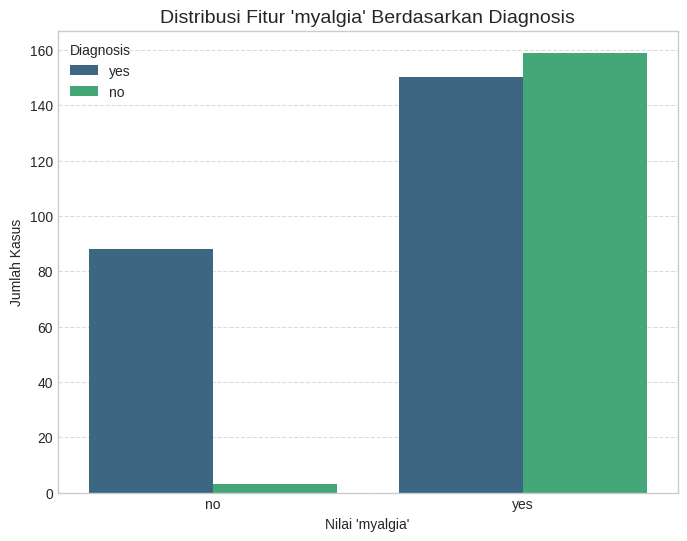

In [7]:
# =============================================================================
# STEP 6: ANALISIS DIAGNOSTIK PADA FITUR YANG DIPILIH (ROBUST)
# =============================================================================
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Pilih fitur yang ingin dianalisis dari X_train (yang belum di-scale) ---
# 'myalgia' adalah contoh fitur yang lolos dari pembersihan di Step 2.
# Anda bisa menggantinya dengan fitur lain yang ada di X_train.columns
feature_to_analyze = 'myalgia'

print(f"🔬 Menganalisis distribusi nilai pada kolom '{feature_to_analyze}' di data latih...")

# --- Lakukan pengecekan apakah fitur yang dipilih benar-benar ada ---
if feature_to_analyze in X_train.columns:

    # Gabungkan sementara X_train (bukan X_train_std) dengan y_train untuk analisis
    df_diagnostic = X_train.copy()
    df_diagnostic['diagnosing'] = y_train

    # 1. Tampilkan Value Counts dari fitur
    print(f"\n--- Value Counts untuk Kolom '{feature_to_analyze}' ---")
    display(df_diagnostic[feature_to_analyze].value_counts())

    # 2. Gunakan crosstab untuk melihat distribusi nilai fitur per kelas target
    print(f"\n--- Distribusi '{feature_to_analyze}' vs Diagnosis (Crosstab) ---")
    crosstab_result = pd.crosstab(df_diagnostic[feature_to_analyze], df_diagnostic['diagnosing'])
    display(crosstab_result.style.background_gradient(cmap='summer'))

    # 3. Gunakan countplot untuk visualisasi yang lebih jelas
    print(f"\n--- Visualisasi Distribusi '{feature_to_analyze}' vs Diagnosis ---")
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature_to_analyze, hue='diagnosing', data=df_diagnostic, palette='viridis')
    plt.title(f"Distribusi Fitur '{feature_to_analyze}' Berdasarkan Diagnosis", fontsize=14)
    plt.xlabel(f"Nilai '{feature_to_analyze}'")
    plt.ylabel("Jumlah Kasus")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Diagnosis')
    plt.show()

else:
    print("\n" + "⚠️"*60)
    print(f"PERINGATAN: Kolom '{feature_to_analyze}' tidak ditemukan dalam data latih (X_train).")
    print("   Ini kemungkinan besar karena fitur tersebut telah dihapus secara otomatis pada Step 2.")
    print("   Silakan pilih fitur lain yang ada dari daftar berikut:")
    print(list(X_train.columns))
    print("⚠️"*60)

In [8]:
# =============================================================================
# STEP 7: PENANGANAN MISSING VALUE (LOGIKA ANTI-LEAKAGE)
# =============================================================================
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

class ComprehensiveMissingValueHandler:
    """
    Menganalisis dan menangani missing values dengan benar pada data yang sudah dipisah,
    menggunakan alur kerja yang mencegah kebocoran data (data leakage).
    """
    def __init__(self):
        self.imputation_plan = None
        # Inisialisasi imputer untuk data numerik (menggunakan median) dan kategorikal (menggunakan modus)
        self.num_imputer = SimpleImputer(strategy='median')
        self.cat_imputer = SimpleImputer(strategy='most_frequent')
        self.num_cols_to_impute = []
        self.cat_cols_to_impute = []

    # --- REVISI: Hapus parameter X_validation ---
    def run_pipeline(self, X_train, X_test):
        """Menjalankan pipeline analisis dan imputasi lengkap."""
        # Analisis untuk membuat rencana imputasi hanya dilakukan pada data latih
        self._analyze_missing_values(X_train)

        # Jika tidak ada nilai yang hilang, kembalikan data asli
        if self.imputation_plan is None or self.imputation_plan.empty:
            print("✅ Tidak ada nilai yang hilang untuk diimputasi. Mengembalikan data set asli.")
            return X_train, X_test

        # Jalankan imputasi jika ada nilai yang hilang
        return self._execute_imputation(X_train, X_test)

    def _analyze_missing_values(self, df):
        """Melakukan analisis pada data latih untuk membuat rencana imputasi."""
        print("\n" + "📊"*40)
        print("BAGIAN 1: ANALISIS MISSING VALUES (TAHAP PERENCANAAN PADA DATA LATIH)")
        print("📊"*40)
        missing = df.isnull().sum()
        missing = missing[missing > 0]
        if missing.empty:
            self.imputation_plan = pd.DataFrame()
            return

        print(f"Ditemukan {len(missing)} kolom dengan nilai yang hilang. Membuat rencana analisis dan strategi...")
        plan_details = [{
            'Kolom': col,
            'Jumlah Hilang': count,
            'Persentase Hilang (%)': f"{(count / len(df)) * 100:.1f}%",
            'Tipe Data': str(df[col].dtype),
            'Strategi Rekomendasi': "Median" if pd.api.types.is_numeric_dtype(df[col]) else "Modus"
        } for col, count in missing.items()]
        self.imputation_plan = pd.DataFrame(plan_details).sort_values(by='Jumlah Hilang', ascending=False)
        print("\n📋 Ringkasan Rencana Imputasi:")
        display(self.imputation_plan.style.background_gradient(cmap='Reds', subset=['Jumlah Hilang']))
        self._create_advanced_missing_visualizations(df)

    def _create_advanced_missing_visualizations(self, df):
        print("\n📈 Membuat Visualisasi Lanjutan Missing Value...")
        fig, axes = plt.subplots(1, 2, figsize=(16, 6)); fig.suptitle('Analisis Missing Values pada Data Latih', fontsize=16)
        missing_df = self.imputation_plan
        sns.heatmap(df[missing_df['Kolom']].isnull(), cbar=False, cmap='viridis_r', ax=axes[0]); axes[0].set_title('Pola Heatmap Missing Values')
        top_10 = missing_df.head(10)
        sns.barplot(x='Jumlah Hilang', y='Kolom', data=top_10, ax=axes[1], palette='viridis')
        axes[1].set_title('Top 10 Kolom dengan Missing Values')
        plt.tight_layout(rect=[0, 0, 1, 0.96]); plt.show()

    # --- REVISI: Hapus parameter X_validation ---
    def _execute_imputation(self, X_train, X_test):
        """Menjalankan imputasi menggunakan alur kerja anti-data leakage."""
        print("\n" + "⚡"*40)
        print("BAGIAN 2: EKSEKUSI IMPUTASI PADA DATA SPLIT (LOGIKA YANG BENAR)")
        print("⚡"*40)

        # Ambil daftar kolom numerik dan kategorikal yang perlu diimputasi dari rencana
        self.num_cols_to_impute = self.imputation_plan[self.imputation_plan['Strategi Rekomendasi'] == 'Median']['Kolom'].tolist()
        self.cat_cols_to_impute = self.imputation_plan[self.imputation_plan['Strategi Rekomendasi'] == 'Modus']['Kolom'].tolist()

        # Pastikan kolom tersebut ada di dataframe (untuk keamanan)
        self.num_cols_to_impute = [col for col in self.num_cols_to_impute if col in X_train.columns]
        self.cat_cols_to_impute = [col for col in self.cat_cols_to_impute if col in X_train.columns]

        X_train_imputed, X_test_imputed = X_train.copy(), X_test.copy()

        print("1. Melakukan 'fit' imputer HANYA pada data LATIH...")
        if self.num_cols_to_impute:
            self.num_imputer.fit(X_train[self.num_cols_to_impute])
        if self.cat_cols_to_impute:
            self.cat_imputer.fit(X_train[self.cat_cols_to_impute])

        print("2. Melakukan 'transform' pada data LATIH dan UJI secara terpisah...")
        if self.num_cols_to_impute:
            X_train_imputed[self.num_cols_to_impute] = self.num_imputer.transform(X_train[self.num_cols_to_impute])
            X_test_imputed[self.num_cols_to_impute] = self.num_imputer.transform(X_test[self.num_cols_to_impute])
        if self.cat_cols_to_impute:
            X_train_imputed[self.cat_cols_to_impute] = self.cat_imputer.transform(X_train[self.cat_cols_to_impute])
            X_test_imputed[self.cat_cols_to_impute] = self.cat_imputer.transform(X_test[self.cat_cols_to_impute])

        self._generate_imputation_report(X_train_imputed, X_test_imputed)
        return X_train_imputed, X_test_imputed

    # --- REVISI: Hapus parameter X_validation ---
    def _generate_imputation_report(self, X_train, X_test):
        print("\n" + "📋"*40)
        print("BAGIAN 3: LAPORAN EKSEKUSI IMPUTASI")
        print("📋"*40)
        print("\nVerifikasi Akhir:")
        print(f"  - Sisa missing values di X_train: {X_train.isnull().sum().sum()}")
        print(f"  - Sisa missing values di X_test:  {X_test.isnull().sum().sum()}")
        if X_train.isnull().sum().sum() == 0 and X_test.isnull().sum().sum() == 0:
            print("  - ✅ BERHASIL. Semua nilai yang hilang telah ditangani dengan benar.")
        else:
            print("  - ⚠️ PERINGATAN. Masih ada nilai yang hilang.")

# =============================================================================
# EKSEKUSI UNTUK STEP 7
# =============================================================================
if 'X_train_selected' in locals():
    print("\n" + "="*80)
    print("🚀 MEMULAI STEP 7: ANALISIS & PENANGANAN MISSING VALUE")
    print("="*80)

    handler = ComprehensiveMissingValueHandler()

    # --- REVISI: Hapus variabel _validation dari pemanggilan dan hasil ---
    X_train_imputed, X_test_imputed = handler.run_pipeline(
        X_train_selected, X_test_selected
    )
    # --------------------------------------------------------------------

    print("\n" + "🎉"*60)
    print("STEP 7 BERHASIL: Nilai yang hilang telah ditangani dengan benar di semua set data.")
    print("="*80)
else:
    print("🛑 Gagal menjalankan Step 7 karena data (`X_train_selected`, dll.) dari Step 4 tidak ditemukan.")


🚀 MEMULAI STEP 7: ANALISIS & PENANGANAN MISSING VALUE

📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊
BAGIAN 1: ANALISIS MISSING VALUES (TAHAP PERENCANAAN PADA DATA LATIH)
📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊
✅ Tidak ada nilai yang hilang untuk diimputasi. Mengembalikan data set asli.

🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 7 BERHASIL: Nilai yang hilang telah ditangani dengan benar di semua set data.


In [9]:
# =============================================================================
# STEP 7.5: PENANGANAN OUTLIER MENGGUNAKAN METODE IQR (OPSIONAL)
# =============================================================================
import numpy as np

print("\n" + "🎯"*40)
print("STEP 7.5: MENDETEKSI DAN MENANGANI OUTLIER PADA DATA LATIH")
print("🎯"*40)

# Gunakan data yang sudah bersih dari missing values
X_train_for_outlier = X_train_imputed.copy()
X_test_for_outlier = X_test_imputed.copy()

# 1. Identifikasi kolom numerik
numerical_cols = X_train_for_outlier.select_dtypes(include=np.number).columns.tolist()
print(f"Ditemukan {len(numerical_cols)} kolom numerik untuk diperiksa outliernya.")

# Dictionary untuk menyimpan batas (boundaries) yang dipelajari dari data latih
outlier_boundaries = {}

# 2. Belajar (fit) batas outlier HANYA dari data latih
for col in numerical_cols:
    Q1 = X_train_for_outlier[col].quantile(0.25)
    Q3 = X_train_for_outlier[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_boundaries[col] = (lower_bound, upper_bound)

# 3. Terapkan (transform) batas tersebut ke semua set data
def cap_outliers(df, boundaries):
    df_capped = df.copy()
    for col in boundaries:
        if col in df_capped.columns:
            lower, upper = boundaries[col]
            # Ganti nilai di bawah batas bawah dengan batas bawah (capping)
            df_capped[col] = np.where(df_capped[col] < lower, lower, df_capped[col])
            # Ganti nilai di atas batas atas dengan batas atas (capping)
            df_capped[col] = np.where(df_capped[col] > upper, upper, df_capped[col])
    return df_capped

X_train_no_outlier = cap_outliers(X_train_for_outlier, outlier_boundaries)
X_test_no_outlier = cap_outliers(X_test_for_outlier, outlier_boundaries)

print("\n✅ Penanganan outlier (capping) selesai.")
print("   - Batas outlier dipelajari HANYA dari X_train.")
print("   - Batas tersebut diterapkan secara konsisten ke X_train dan X_test.")

# --- Verifikasi (Contoh pada satu kolom) ---
sample_col = 'age' # Ganti dengan kolom numerik lain jika perlu
if sample_col in numerical_cols:
    print("\n--- Perbandingan Sebelum & Sesudah Capping (Contoh: Kolom 'age') ---")
    print("\nSebelum:")
    display(X_train_imputed[sample_col].describe())
    print("\nSesudah:")
    display(X_train_no_outlier[sample_col].describe())

# Jangan lupa untuk menggunakan variabel baru ini di langkah selanjutnya
# Contoh: pipeline = FeaturePipeline(X_train_no_outlier, X_test_no_outlier)


🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
STEP 7.5: MENDETEKSI DAN MENANGANI OUTLIER PADA DATA LATIH
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
Ditemukan 8 kolom numerik untuk diperiksa outliernya.

✅ Penanganan outlier (capping) selesai.
   - Batas outlier dipelajari HANYA dari X_train.
   - Batas tersebut diterapkan secara konsisten ke X_train dan X_test.

--- Perbandingan Sebelum & Sesudah Capping (Contoh: Kolom 'age') ---

Sebelum:


,age
count,400.000000
mean,44.255000
std,22.911292
min,2.000000
25%,24.000000
50%,46.000000
75%,64.000000
max,80.000000



Sesudah:


,age
count,400.000000
mean,44.255000
std,22.911292
min,2.000000
25%,24.000000
50%,46.000000
75%,64.000000
max,80.000000


In [10]:
# =============================================================================
# STEP 8: FEATURE ENGINEERING, ENCODING, & SCALING (FINAL TERINTEGRASI & ROBUST)
# =============================================================================
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
import numpy as np
from IPython.display import display

class FeaturePipeline:
    """
    Menjalankan rekayasa fitur, encoding, dan scaling dengan alur kerja yang benar
    untuk mencegah data leakage. Didesain untuk bekerja pada set train dan test.
    """
    # --- REVISI: Hapus X_validation dari constructor ---
    def __init__(self, X_train, X_test):
        self.X_train = X_train.copy()
        self.X_test = X_test.copy()
        self.learned_params = {} # Kamus untuk menyimpan 'fitted' scalers/encoders

    # --- REVISI: Sesuaikan nilai yang dikembalikan ---
    def run_pipeline(self):
        print("\n" + "🛠️"*40)
        print("STEP 8: FEATURE ENGINEERING, ENCODING, DAN SCALING (ADAPTIF)")
        print("🛠️"*40)

        # 1. Rekayasa fitur (skor gejala & grup umur)
        self._engineer_features()
        # 2. Lakukan encoding dan scaling
        self._encode_and_scale()

        self._generate_final_report()
        return self.X_train, self.X_test

    def _engineer_features(self):
        print("\n--- 8.1: Rekayasa Fitur Tambahan (Skor Gejala & Grup Umur) ---")

        def transform_features(df, params, is_train=False):
            df_engineered = df.copy()

            # --- Rekayasa Skor Gejala ---
            symptom_cols = ['chills', 'sore_throat', 'rectal_pain_or_pain_on_defecation', 'headache', 'myalgia']
            symptom_cols_exist = [c for c in symptom_cols if c in df_engineered.columns]

            if symptom_cols_exist:
                print(f"  - Menghitung 'symptom_score' dari fitur: {symptom_cols_exist}")
                # Membuat skor gejala berdasarkan jumlah gejala 'yes'
                df_engineered['symptom_score'] = df_engineered[symptom_cols_exist].apply(
                    lambda row: sum(1 for val in row if str(val).lower() == 'yes'), axis=1
                )
            else:
                print("  - ⚠️ INFO: Tidak ada fitur gejala yang ditemukan untuk membuat 'symptom_score'.")

            # --- Rekayasa Grup Umur ---
            if 'age' in df_engineered.columns:
                print("  - Membuat 'age_group' dari fitur 'age'.")
                # Mengelompokkan umur ke dalam kategori
                df_engineered['age_group'] = pd.cut(
                    df_engineered['age'],
                    bins=[0, 18, 40, 65, np.inf],
                    labels=[0, 1, 2, 3], # 0: young, 1: adult, 2: middle-aged, 3: senior
                    include_lowest=True
                ).astype(int)

            return df_engineered

        # 'Belajar' parameter hanya dari data latih
        self.X_train = transform_features(self.X_train, self.learned_params, is_train=True)
        # Terapkan transformasi ke data uji
        self.X_test = transform_features(self.X_test, self.learned_params, is_train=False)
        print("  ✅ Rekayasa fitur tambahan selesai.")

    def _encode_and_scale(self):
        print("\n--- 8.2: Encoding (One-Hot) dan Scaling (StandardScaler) ---")

        # Identifikasi tipe kolom HANYA dari data latih
        categorical_cols = self.X_train.select_dtypes(include=['object', 'category']).columns.tolist()
        numerical_cols = self.X_train.select_dtypes(include=np.number).columns.tolist()

        # Simpan daftar kolom ini untuk digunakan nanti
        self.learned_params['categorical_cols'] = categorical_cols
        self.learned_params['numerical_cols'] = numerical_cols

        # Latih (fit) encoder dan scaler HANYA pada data latih
        if categorical_cols:
            ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype=np.int8)
            ohe.fit(self.X_train[categorical_cols])
            self.learned_params['ohe'] = ohe
            print(f"  - OneHotEncoder dilatih pada {len(categorical_cols)} kolom kategorikal.")

        if numerical_cols:
            scaler = StandardScaler()
            scaler.fit(self.X_train[numerical_cols])
            self.learned_params['scaler'] = scaler
            print(f"  - StandardScaler dilatih pada {len(numerical_cols)} kolom numerik.")

        # Terapkan (transform) ke semua set data menggunakan fungsi bantuan
        print("  - Menerapkan transformasi ke data Train dan Test...")
        self.X_train = self._apply_transformations(self.X_train)
        self.X_test = self._apply_transformations(self.X_test)
        print("  ✅ Encoding dan scaling berhasil diterapkan.")

    def _apply_transformations(self, df):
        """Fungsi bantuan untuk menerapkan encoder dan scaler yang sudah dilatih."""
        original_index = df.index

        # Ambil parameter yang sudah dipelajari
        categorical_cols = self.learned_params['categorical_cols']
        numerical_cols = self.learned_params['numerical_cols']

        # Buat dataframe kosong untuk menampung hasil
        df_processed = pd.DataFrame(index=original_index)

        # Proses kolom numerik jika ada
        if numerical_cols and 'scaler' in self.learned_params:
            scaler = self.learned_params['scaler']
            scaled_data = scaler.transform(df[numerical_cols])
            df_scaled = pd.DataFrame(scaled_data, index=original_index, columns=numerical_cols)
            df_processed = pd.concat([df_processed, df_scaled], axis=1)

        # Proses kolom kategorikal jika ada
        if categorical_cols and 'ohe' in self.learned_params:
            ohe = self.learned_params['ohe']
            encoded_data = ohe.transform(df[categorical_cols])
            df_encoded = pd.DataFrame(encoded_data, index=original_index, columns=ohe.get_feature_names_out(categorical_cols))
            df_processed = pd.concat([df_processed, df_encoded], axis=1)

        return df_processed

    # --- REVISI: Sesuaikan laporan akhir ---
    def _generate_final_report(self):
        print("\n" + "📋"*40); print("LAPORAN AKHIR UNTUK STEP 8"); print("📋"*40)
        print("\nBentuk Data Akhir:")
        print(f"  - Fitur Latih Terproses (X_train_final): {self.X_train.shape}")
        print(f"  - Fitur Uji Terproses (X_test_final):   {self.X_test.shape}")
        if self.X_train.shape[1] == self.X_test.shape[1]:
            print("  ✅ Jumlah kolom konsisten antara set data latih dan uji.")
        else:
            print("  ⚠️ PERINGATAN: Jumlah kolom TIDAK KONSISTEN antara set data latih dan uji.")


# =============================================================================
# EKSEKUSI UNTUK STEP 8
# =============================================================================
if 'X_train_imputed' in locals():
    print("\n" + "="*80); print("🚀 MEMULAI STEP 8: FEATURE ENGINEERING, ENCODING, & SCALING"); print("="*80)

    # --- REVISI: Hapus _imputed dari pemanggilan dan hasil ---
    pipeline = FeaturePipeline(X_train_imputed, X_test_imputed)
    X_train_final, X_test_final = pipeline.run_pipeline()
    # --------------------------------------------------------------------

    print("\n" + "🏁"*60)
    print("STEP 8 BERHASIL: Feature Engineering, Encoding, & Scaling selesai.")
    print("🏁"*60)
    print("Data berikut sekarang 100% siap untuk training model dan evaluasi akhir.")
    display(X_train_final.head())
    print("="*80)
else:
    print("🛑 Gagal menjalankan Step 8 karena data hasil imputasi dari Step 7 tidak ditemukan.")


🚀 MEMULAI STEP 8: FEATURE ENGINEERING, ENCODING, & SCALING

🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️
STEP 8: FEATURE ENGINEERING, ENCODING, DAN SCALING (ADAPTIF)
🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️

--- 8.1: Rekayasa Fitur Tambahan (Skor Gejala & Grup Umur) ---
  - Menghitung 'symptom_score' dari fitur: ['sore_throat', 'myalgia']
  - Membuat 'age_group' dari fitur 'age'.
  - Menghitung 'symptom_score' dari fitur: ['sore_throat', 'myalgia']
  - Membuat 'age_group' dari fitur 'age'.
  ✅ Rekayasa fitur tambahan selesai.

--- 8.2: Encoding (One-Hot) dan Scaling (StandardScaler) ---
  - OneHotEncoder dilatih pada 4 kolom kategorikal.
  - StandardScaler dilatih pada 10 kolom numerik.
  - Menerapkan transformasi ke data Train dan Test...
  ✅ Encoding dan scaling berhasil diterapkan.

📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋
LAPORAN AKHIR UNTUK STEP 8
📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋

Bentuk Data Akhi

,hematocrit_normal_3949_for_men_and3545_for_women,wbc_count_cellsmm3_normaladult_range__40009000,ast_level_ul_normal_adult_range_035,alt_level_ul_normal_adult_range__035,albumin_level_mgdl_normal_adult_range_35__55,calcium_level_mmoll_normal_adult_range__9_105,alp_level_ul_normal_adult_range_40140,age,symptom_score,age_group,lymphadenopathy_no,lymphadenopathy_yes,myalgia_no,myalgia_yes,sore_throat_no,sore_throat_yes,sex_female,sex_male
312,0.781649,0.243421,0.308265,0.828442,-0.762178,-1.378061,0.337669,-1.365883,-0.956354,-1.559986,1,0,1,0,0,1,0,1
51,0.024604,-1.159673,0.508762,0.618111,-0.247193,-0.671691,0.411923,-1.234779,-0.956354,-1.559986,1,0,1,0,0,1,0,1
356,1.538694,-0.511215,0.809509,0.407780,-0.556184,-0.759987,0.560430,1.299894,1.005397,1.337821,0,1,0,1,0,1,0,1
226,-1.489486,-0.667079,-2.699197,-1.274870,1.194766,0.988277,-0.144980,-1.234779,1.005397,-1.559986,1,0,0,1,0,1,0,1
199,-0.732441,-0.440324,0.208016,0.302614,0.061798,0.122975,0.449050,0.207362,1.005397,0.371885,0,1,0,1,0,1,1,0


In [11]:
# =============================================================================
# STEP 9: ENCODING VARIABEL TARGET (ROBUST)
# =============================================================================
from sklearn.preprocessing import LabelEncoder

print("\n" + "🎯"*40)
print("STEP 9: ENCODING VARIABEL TARGET (y)")
print("🎯"*40)

# Pastikan variabel target dari Step 3 ada
if 'y_train' in locals() and 'y_test' in locals():

    # Definisikan apa yang dianggap sebagai label kelas positif
    POSITIVE_LABEL = 'yes'

    # 1. Inisialisasi LabelEncoder
    le = LabelEncoder()

    # 2. Fit encoder HANYA pada y_train, lalu transform y_train dan y_test
    y_train_encoded = le.fit_transform(y_train)
    y_test_encoded = le.transform(y_test)

    # 3. Tampilkan mapping dan cari tahu representasi numerik dari kelas positif
    print("\n--- Pemetaan Label ---")
    positive_class_index = None # Inisialisasi
    for index, label in enumerate(le.classes_):
        print(f"  - '{label}'  ->  {index}")
        # Cek jika label saat ini adalah label positif yang kita tentukan
        if str(label).lower() == POSITIVE_LABEL:
            positive_class_index = index

    print(f"\n✅ Variabel target berhasil di-encode.")

    # 4. Berikan konfirmasi tentang kelas positif
    if positive_class_index is not None:
        print(f"  - Kelas positif ('{POSITIVE_LABEL}') direpresentasikan sebagai: {positive_class_index}")
    else:
        # Peringatan jika label positif tidak ditemukan
        print(f"  - ⚠️ PERINGATAN: Label kelas positif ('{POSITIVE_LABEL}') tidak ditemukan di data latih.")
        print(f"     Label yang ditemukan adalah: {list(le.classes_)}")

    # --- REVISI: Hapus laporan untuk y_validation_encoded ---
    print("\nBentuk Data Target Setelah Encoding:")
    print(f"  - y_train_encoded shape: {y_train_encoded.shape}")
    print(f"  - y_test_encoded shape:  {y_test_encoded.shape}")
    print("="*80)

else:
    print("🛑 Gagal menjalankan Step 9 karena variabel y_train dan y_test dari Step 3 tidak ditemukan.")


🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
STEP 9: ENCODING VARIABEL TARGET (y)
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯

--- Pemetaan Label ---
  - 'no'  ->  0
  - 'yes'  ->  1

✅ Variabel target berhasil di-encode.
  - Kelas positif ('yes') direpresentasikan sebagai: 1

Bentuk Data Target Setelah Encoding:
  - y_train_encoded shape: (400,)
  - y_test_encoded shape:  (100,)


In [12]:
# =============================================================================
# STEP 10: PEMBERSIHAN FITUR AKHIR BERDASARKAN KORELASI (LOGIKA ANTI-LEAKAGE)
# =============================================================================
import pandas as pd

print("\n" + "="*80)
print("🚀 MEMULAI STEP 10: PEMBERSIHAN FITUR AKHIR BERDASARKAN KORELASI (PADA DATA LATIH)")
print("="*80)

# Pastikan variabel yang dibutuhkan dari langkah sebelumnya ada
if 'X_train_final' in locals() and 'y_train_encoded' in locals():

    print("🔬 Menghitung korelasi absolut fitur terhadap TARGET hanya pada data latih...")

    # Buat Series dari target (y) dengan indeks yang sama seperti fitur (X) untuk penggabungan yang aman
    target_series = pd.Series(y_train_encoded, index=X_train_final.index, name='TARGET')

    # Gabungkan fitur dan target dari data latih untuk analisis korelasi
    df_corr_check = pd.concat([X_train_final, target_series], axis=1)

    # Hitung korelasi absolut dari setiap fitur terhadap 'TARGET'
    # .drop('TARGET') untuk menghapus korelasi target dengan dirinya sendiri (yang selalu 1.0)
    corr_with_target = df_corr_check.corr(numeric_only=True)['TARGET'].abs().drop(labels=['TARGET'])

    # Tentukan ambang batas korelasi. Fitur dengan korelasi di atas ini akan dihapus.
    correlation_threshold = 0.60

    # Dapatkan daftar fitur yang korelasinya melebihi ambang batas
    features_to_drop = corr_with_target[corr_with_target > correlation_threshold]
    features_to_drop_list = features_to_drop.index.tolist()

    if features_to_drop_list:
        print(f"\n✅ Ditemukan {len(features_to_drop_list)} fitur dengan korelasi absolut > {correlation_threshold} pada data latih.")
        print("   Fitur-fitur ini akan dihapus dari set data Latih dan Uji.")

        # Tampilkan fitur yang akan dihapus beserta nilai korelasinya
        print("\n--- Fitur yang akan Dihapus (diurutkan berdasarkan korelasi) ---")
        print(features_to_drop.sort_values(ascending=False).to_string())

        # Hapus fitur dari set Latih dan Uji
        X_train_clean = X_train_final.drop(columns=features_to_drop_list, errors='ignore')
        X_test_clean = X_test_final.drop(columns=features_to_drop_list, errors='ignore')

        print("\n--- Ukuran Data Baru Setelah Pembersihan ---")
        print(f"  - Bentuk X_train_clean: {X_train_clean.shape} (Sebelumnya: {X_train_final.shape})")
        print(f"  - Bentuk X_test_clean:  {X_test_clean.shape} (Sebelumnya: {X_test_final.shape})")
    else:
        print(f"\n✅ Tidak ada fitur yang melebihi ambang batas korelasi ({correlation_threshold}).")
        print("   Menggunakan data dari langkah sebelumnya tanpa perubahan.")
        # Jika tidak ada yang dihapus, teruskan variabel yang ada
        X_train_clean = X_train_final
        X_test_clean = X_test_final

    print("\n" + "🎉"*60)
    print("STEP 10 BERHASIL: Pembersihan fitur berdasarkan korelasi selesai.")
    print("="*80)

else:
    print("🛑 Gagal menjalankan Step 10 karena data (`X_train_final`, dll.) dari Step 8 & 9 tidak ditemukan.")


🚀 MEMULAI STEP 10: PEMBERSIHAN FITUR AKHIR BERDASARKAN KORELASI (PADA DATA LATIH)
🔬 Menghitung korelasi absolut fitur terhadap TARGET hanya pada data latih...

✅ Ditemukan 6 fitur dengan korelasi absolut > 0.6 pada data latih.
   Fitur-fitur ini akan dihapus dari set data Latih dan Uji.

--- Fitur yang akan Dihapus (diurutkan berdasarkan korelasi) ---
albumin_level_mgdl_normal_adult_range_35__55     0.713480
sore_throat_yes                                  0.697554
sore_throat_no                                   0.697554
calcium_level_mmoll_normal_adult_range__9_105    0.646865
alt_level_ul_normal_adult_range__035             0.615839
ast_level_ul_normal_adult_range_035              0.613086

--- Ukuran Data Baru Setelah Pembersihan ---
  - Bentuk X_train_clean: (400, 12) (Sebelumnya: (400, 18))
  - Bentuk X_test_clean:  (100, 12) (Sebelumnya: (100, 18))

🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 10 BERHASIL: Pembersihan fitur berdasarkan korelasi selesai.


In [13]:
# =============================================================================
# STEP 11: MENYEIMBANGKAN DATA LATIH DENGAN SMOTE (OVERSAMPLING)
# =============================================================================
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

print("\n" + "⚖️"*40)
print("STEP 11: MENYEIMBANGKAN DATA LATIH MENGGUNAKAN SMOTE")
print("⚖️"*40)

# Pastikan variabel dari Step 10 ada
if 'X_train_clean' in locals():

    # --- REVISI: Gunakan X_train_clean dari Step 10 sebagai input ---
    X_input_for_smote = X_train_clean
    y_input_for_smote = y_train_encoded
    # -------------------------------------------------------------

    # Inisialisasi SMOTE dengan random_state untuk hasil yang konsisten
    smote = SMOTE(random_state=123)

    # Simpan nama kolom sebelum SMOTE, karena SMOTE menghasilkan array NumPy
    original_columns = X_input_for_smote.columns

    # Tampilkan distribusi kelas sebelum SMOTE
    print("\n--- Distribusi Kelas Sebelum SMOTE ---")
    unique_before, counts_before = np.unique(y_input_for_smote, return_counts=True)
    print(dict(zip(unique_before, counts_before)))

    print("\n🔄 Menerapkan SMOTE pada data latih...")
    # Terapkan SMOTE: ia akan membuat sampel sintetis dari kelas minoritas
    X_train_smote, y_train_smote = smote.fit_resample(X_input_for_smote, y_input_for_smote)

    # Ubah kembali hasil array NumPy menjadi DataFrame dengan kolom yang benar
    X_train_smote = pd.DataFrame(X_train_smote, columns=original_columns)

    # Tampilkan distribusi kelas setelah SMOTE untuk verifikasi
    print("\n--- Distribusi Kelas Setelah SMOTE ---")
    unique_after, counts_after = np.unique(y_train_smote, return_counts=True)
    print(dict(zip(unique_after, counts_after)))


    print(f"\n✅ Data latih berhasil diseimbangkan.")
    print(f"   - Ukuran X_train sebelum SMOTE: {X_input_for_smote.shape}")
    print(f"   - Ukuran X_train setelah SMOTE:  {X_train_smote.shape}")
    print("="*80)

    # --- CATATAN PENTING UNTUK LANGKAH SELANJUTNYA ---
    print("CATATAN: Untuk pemodelan, sekarang gunakan X_train_smote dan y_train_smote sebagai data latih.")
    print("Data uji (X_test_clean dan y_test_encoded) tetap TIDAK BERUBAH.")
    print("="*80)


else:
    print("🛑 Gagal menjalankan Step 11 karena data bersih (`X_train_clean`) dari Step 10 tidak ditemukan.")


⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️
STEP 11: MENYEIMBANGKAN DATA LATIH MENGGUNAKAN SMOTE
⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️

--- Distribusi Kelas Sebelum SMOTE ---
{np.int64(0): np.int64(162), np.int64(1): np.int64(238)}

🔄 Menerapkan SMOTE pada data latih...

--- Distribusi Kelas Setelah SMOTE ---
{np.int64(0): np.int64(238), np.int64(1): np.int64(238)}

✅ Data latih berhasil diseimbangkan.
   - Ukuran X_train sebelum SMOTE: (400, 12)
   - Ukuran X_train setelah SMOTE:  (476, 12)
CATATAN: Untuk pemodelan, sekarang gunakan X_train_smote dan y_train_smote sebagai data latih.
Data uji (X_test_clean dan y_test_encoded) tetap TIDAK BERUBAH.


In [14]:
# =======================================================================
#UJI DIAGNOSTIK FINAL DENGAN MODEL MINIMALIS
# =============================================================================
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from IPython.display import display

print("\n" + "🔬"*40)
print("UJI DIAGNOSTIK DENGAN MODEL MINIMALIS (PADA TEST SET)")
print("🔬"*40)

# Pastikan variabel dari Step 10 & 9 ada
if 'X_train_clean' in locals() and 'X_test_clean' in locals():

    # 1. Pilih HANYA fitur yang paling dasar dan tidak mungkin bocor.
    # Daftar ini mungkin perlu disesuaikan berdasarkan nama kolom setelah One-Hot Encoding di Step 8.
    # Contoh: 'sex_male', 'country_of_acquisition_Spain', dll.
    # Kita akan cari fitur yang mengandung kata kunci ini.

    keywords = ['age', 'sex_', 'country_']
    minimal_features = []
    for col in X_train_clean.columns:
        if any(keyword in col for keyword in keywords):
            minimal_features.append(col)

    # Pastikan hanya menggunakan fitur yang ada di kedua set data
    existing_minimal_features = [f for f in minimal_features if f in X_train_clean.columns and f in X_test_clean.columns]

    if not existing_minimal_features:
        print("🛑 GAGAL: Tidak ada fitur minimal ('age', 'sex_*', 'country_*') yang ditemukan.")
        print("   Periksa kembali nama kolom di X_train_clean.columns setelah proses one-hot encoding.")
    else:
        print(f"Menguji model HANYA dengan {len(existing_minimal_features)} fitur dasar berikut:")
        print(f" -> {existing_minimal_features}")

        # 2. Buat dataset sementara yang sangat sederhana
        X_train_minimal = X_train_clean[existing_minimal_features]
        # --- REVISI: Gunakan X_test_clean ---
        X_test_minimal = X_test_clean[existing_minimal_features]

        # 3. Gunakan SATU model yang diregularisasi dengan ketat untuk mencegah overfitting
        test_model = RandomForestClassifier(max_depth=5, min_samples_leaf=10, random_state=123)

        # 4. Latih dan evaluasi
        # Latih pada data latih (sebelum SMOTE untuk mencerminkan data asli)
        test_model.fit(X_train_minimal, y_train_encoded)

        # --- REVISI: Evaluasi pada TEST SET ---
        preds = test_model.predict(X_test_minimal)
        accuracy = accuracy_score(y_test_encoded, preds)

        print("\n--- HASIL UJI MODEL MINIMALIS ---")
        print(f"Akurasi pada SET UJI (TEST SET): {accuracy:.4f}")

        # 5. Interpretasi hasil
        if accuracy > 0.95: # Ambang batas bisa disesuaikan
            print("\n🚨 TEMUAN KRITIS: Skor akurasi masih sangat tinggi bahkan dengan fitur minimal.")
            print("   Ini menandakan ada kemungkinan masalah integritas data yang lebih dalam,")
            print("   seperti duplikasi data antara set latih dan uji, atau fitur dasar yang ternyata bocor.")
        else:
            print("\n✅ UJI DIAGNOSTIK BERHASIL! Skor turun ke level yang lebih realistis.")
            print("   Ini mengindikasikan bahwa performa tinggi sebelumnya memang disebabkan oleh fitur-fitur")
            print("   kompleks yang telah kita proses atau hapus, bukan karena kebocoran data fundamental.")

else:
    print("🛑 Gagal menjalankan Step 12 karena data bersih (`X_train_clean`, `X_test_clean`) dari Step 10 tidak ditemukan.")


🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬
UJI DIAGNOSTIK DENGAN MODEL MINIMALIS (PADA TEST SET)
🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬
Menguji model HANYA dengan 4 fitur dasar berikut:
 -> ['age', 'age_group', 'sex_female', 'sex_male']

--- HASIL UJI MODEL MINIMALIS ---
Akurasi pada SET UJI (TEST SET): 0.5700

✅ UJI DIAGNOSTIK BERHASIL! Skor turun ke level yang lebih realistis.
   Ini mengindikasikan bahwa performa tinggi sebelumnya memang disebabkan oleh fitur-fitur
   kompleks yang telah kita proses atau hapus, bukan karena kebocoran data fundamental.



🚀 MEMULAI ANALISIS DIAGNOSTIK PADA DATA YANG SUDAH BERSIH

📊 Menganalisis Feature Importance pada data bersih (X_train_clean)...


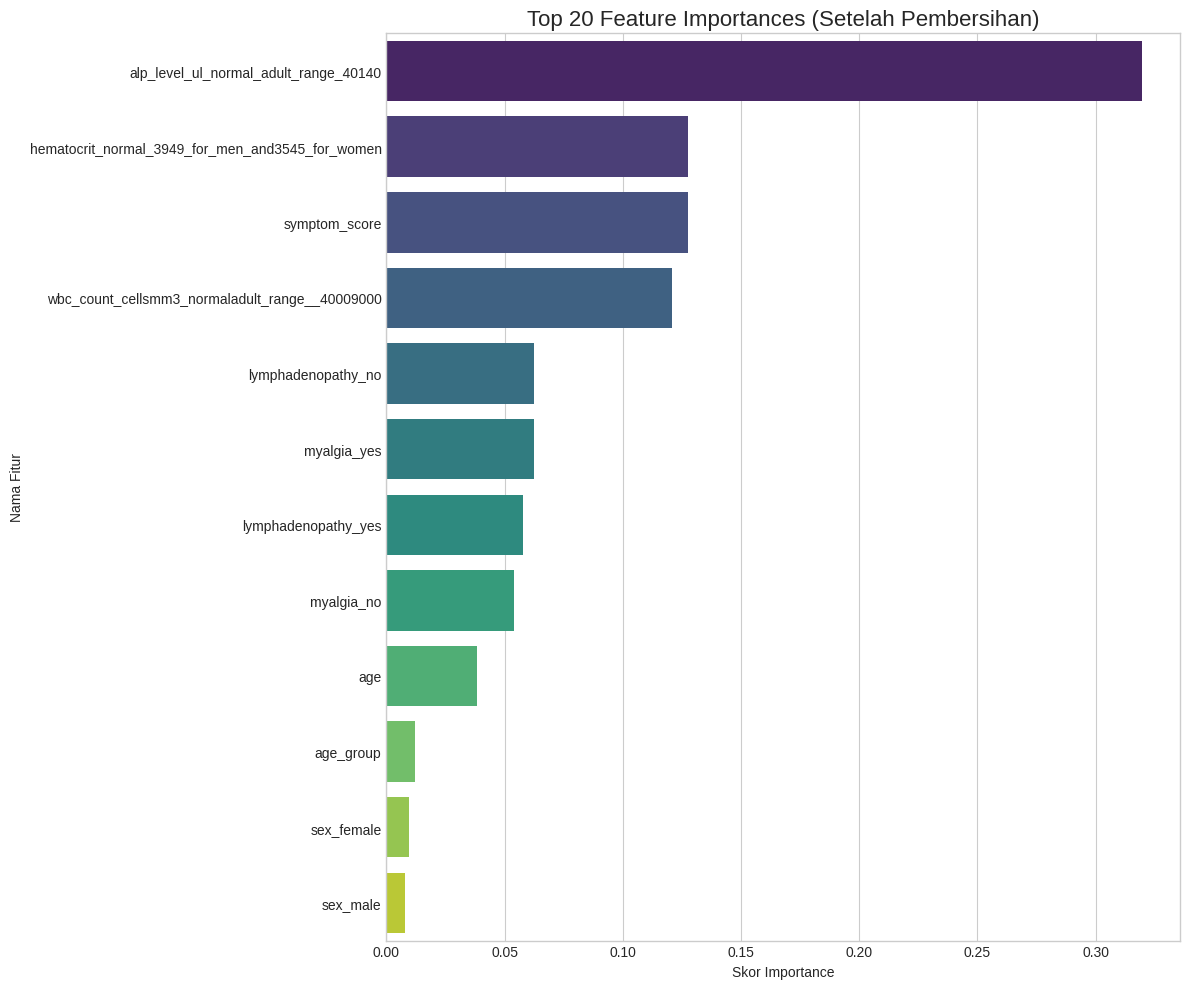


--- Fitur Paling Penting (Setelah Pembersihan) ---


,Fitur,Importance
2,alp_level_ul_normal_adult_range_40140,0.319747
0,hematocrit_normal_3949_for_men_and3545_for_women,0.127700
4,symptom_score,0.127649
1,wbc_count_cellsmm3_normaladult_range__40009000,0.120678
6,lymphadenopathy_no,0.062449
9,myalgia_yes,0.062256
7,lymphadenopathy_yes,0.057830
8,myalgia_no,0.054017
3,age,0.038201
5,age_group,0.011953




📊 Menganalisis Korelasi pada data bersih (X_train_clean)...

--- Top 20 Fitur dengan Korelasi Tertinggi Terhadap Target ---


,TARGET
alp_level_ul_normal_adult_range_40140,0.555628
wbc_count_cellsmm3_normaladult_range__40009000,0.513875
hematocrit_normal_3949_for_men_and3545_for_women,0.501730
myalgia_no,0.411279
myalgia_yes,0.411279
symptom_score,0.279491
lymphadenopathy_yes,0.114902
lymphadenopathy_no,0.114902
age_group,0.057211
age,0.041910


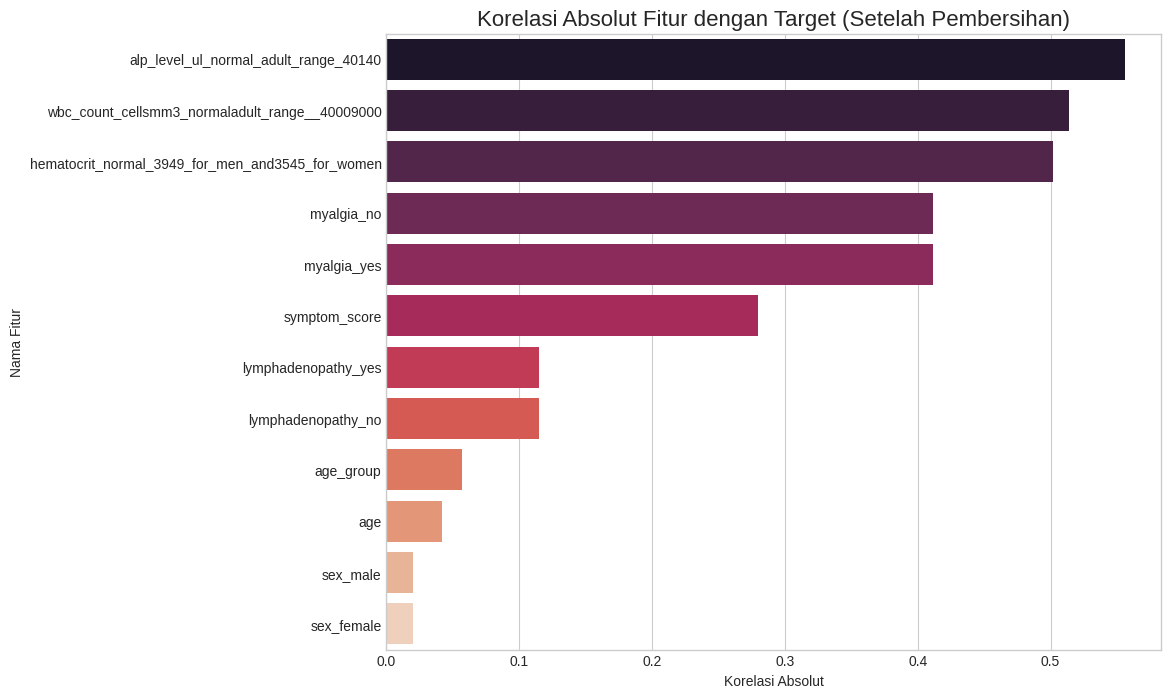

In [15]:
# =============================================================================
# ANALISIS DIAGNOSTIK PADA DATA BERSIH (SETELAH SELEKSI FITUR)
# =============================================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display

print("\n" + "="*80)
print("🚀 MEMULAI ANALISIS DIAGNOSTIK PADA DATA YANG SUDAH BERSIH")
print("="*80)

# Pastikan variabel dari Step 10 & 9 ada
if 'X_train_clean' in locals() and 'y_train_encoded' in locals():

    # --- Gunakan X_train_clean untuk analisis, karena ini merefleksikan data asli yang sudah bersih ---
    X_analysis = X_train_clean
    y_analysis = y_train_encoded

    # --- 1. Analisis Feature Importance ---
    print("\n📊 Menganalisis Feature Importance pada data bersih (X_train_clean)...")

    # Latih model sementara untuk mendapatkan feature importance
    diagnostic_model = RandomForestClassifier(n_estimators=100, random_state=123)
    diagnostic_model.fit(X_analysis, y_analysis)

    feature_importances = pd.DataFrame({
        'Fitur': X_analysis.columns,
        'Importance': diagnostic_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    top_20_features = feature_importances.head(20)

    # Visualisasi
    plt.figure(figsize=(12, 10))
    sns.barplot(x='Importance', y='Fitur', data=top_20_features, palette='viridis')
    plt.title('Top 20 Feature Importances (Setelah Pembersihan)', fontsize=16)
    plt.xlabel('Skor Importance')
    plt.ylabel('Nama Fitur')
    plt.tight_layout()
    plt.show()

    print("\n--- Fitur Paling Penting (Setelah Pembersihan) ---")
    display(top_20_features)

    # --- 2. Analisis Korelasi dengan Target ---
    print("\n" + "="*80)
    print("\n📊 Menganalisis Korelasi pada data bersih (X_train_clean)...")

    # Gabungkan fitur dan target untuk menghitung korelasi
    df_corr_analysis = X_analysis.copy()
    df_corr_analysis['TARGET'] = y_analysis

    # Hitung korelasi absolut dengan target dan urutkan
    correlation_with_target = df_corr_analysis.corr()['TARGET'].abs().sort_values(ascending=False).drop('TARGET')
    top_20_correlated = correlation_with_target.head(20)

    print("\n--- Top 20 Fitur dengan Korelasi Tertinggi Terhadap Target ---")
    display(top_20_correlated.to_frame())

    # Visualisasi
    plt.figure(figsize=(10, 8))
    sns.barplot(x=top_20_correlated.values, y=top_20_correlated.index, palette='rocket')
    plt.title('Korelasi Absolut Fitur dengan Target (Setelah Pembersihan)', fontsize=16)
    plt.xlabel('Korelasi Absolut')
    plt.ylabel('Nama Fitur')
    plt.show()

else:
    print("🛑 Gagal menjalankan Step 13 karena data bersih (`X_train_clean`) dari Step 10 tidak ditemukan.")

In [16]:
# =============================================================================
# STEP 14: MODEL TRAINING, TUNING (GridSearchCV), & FINAL EVALUATION (VERSI KOREKSI)
# =============================================================================
import pandas as pd
import time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
from IPython.display import display

# --- PERBAIKAN: Inisialisasi dictionary untuk menyimpan objek model TERLATIH ---
best_model_objects = {}

print("\n" + "🏆"*40)
print("STEP 14: MODEL TRAINING, TUNING WITH 5-FOLD CV, AND FINAL EVALUATION")
print("🏆"*40)

# Pastikan semua data yang diperlukan ada
if 'X_train_smote' in locals() and 'X_test_clean' in locals():

    # Untuk XGBoost, pastikan nama kolom tidak mengandung karakter JSON
    X_train_smote.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train_smote.columns]
    X_test_clean.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_test_clean.columns]

    pipeline_setup = {
        "Random Forest": {
            "model": RandomForestClassifier(random_state=123),
            "params": {
                'n_estimators': [100, 200], 'max_depth': [10, 20, None],
                'min_samples_leaf': [2, 4], 'criterion': ['gini', 'entropy']
            }
        },
        "XGBoost": {
            "model": XGBClassifier(random_state=123, use_label_encoder=False, eval_metric='logloss'),
            "params": {
                'n_estimators': [100, 200], 'max_depth': [3, 5, 7],
                'learning_rate': [0.05, 0.1], 'subsample': [0.7, 1.0]
            }
        },
        "CatBoost": {
            "model": CatBoostClassifier(random_state=123, verbose=0),
            "params": {
                'iterations': [200, 500], 'depth': [4, 6],
                'learning_rate': [0.05, 0.1], 'l2_leaf_reg': [3, 7]
            }
        }
    }

    final_results = []

    for model_name, config in pipeline_setup.items():
        print("\n" + "="*60); print(f"🚀 Processing Model: {model_name}"); print("="*60)

        grid_search = GridSearchCV(
            estimator=config["model"], param_grid=config["params"],
            cv=5, scoring='f1', n_jobs=-1, verbose=1
        )

        start_time = time.time()
        grid_search.fit(X_train_smote, y_train_smote)
        training_time = time.time() - start_time

        best_model = grid_search.best_estimator_

        # --- PERBAIKAN KUNCI: Simpan objek model menggunakan nama dasarnya ---
        # Ini memastikan Step 17 bisa menemukan modelnya dengan benar.
        best_model_objects[model_name] = best_model

        print(f"\n--- Hasil Cross-Validation untuk {model_name} ---")
        print(f"Skor F1 CV terbaik: {grid_search.best_score_:.4f}")
        print(f"Parameter terbaik: {grid_search.best_params_}")

        print("\n--- Evaluasi Akhir pada Test Set (20%) ---")
        y_pred_test = best_model.predict(X_test_clean)

        test_accuracy = accuracy_score(y_test_encoded, y_pred_test)
        test_precision = precision_score(y_test_encoded, y_pred_test, zero_division=0)
        test_recall = recall_score(y_test_encoded, y_pred_test, zero_division=0)
        test_f1 = f1_score(y_test_encoded, y_pred_test, zero_division=0)

        print(classification_report(y_test_encoded, y_pred_test))

        final_results.append({
            "Model": model_name,
            "CV F1-Score": grid_search.best_score_,
            "Test Accuracy": test_accuracy,
            "Test Precision": test_precision,
            "Test Recall": test_recall,
            "Test F1-Score": test_f1,
            "Training Time (s)": training_time
        })

    print("\n" + "📊"*40)
    print("PERBANDINGAN KINERJA MODEL FINAL PADA TEST SET")
    print("📊"*40)

    results_df = pd.DataFrame(final_results).sort_values(by='Test F1-Score', ascending=False)

    columns_to_color = ['CV F1-Score', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-Score']

    display(results_df.style.format(precision=4).background_gradient(
        cmap='viridis',
        subset=columns_to_color
    ))

else:
    print("🛑 Gagal menjalankan Step 14 karena data yang dibutuhkan dari langkah-langkah sebelumnya tidak ditemukan.")


🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆
STEP 14: MODEL TRAINING, TUNING WITH 5-FOLD CV, AND FINAL EVALUATION
🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆

🚀 Processing Model: Random Forest
Fitting 5 folds for each of 24 candidates, totalling 120 fits

--- Hasil Cross-Validation untuk Random Forest ---
Skor F1 CV terbaik: 0.9665
Parameter terbaik: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 200}

--- Evaluasi Akhir pada Test Set (20%) ---
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        41
           1       0.95      0.97      0.96        59

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100


🚀 Processing Model: XGBoost
Fitting 5 folds for each of 24 candidates, totalling 120 fits

--- Hasil Cross-Validation untuk XGBoost ---
Skor F1 CV terbaik: 0.9658
Parameter terbaik: {'learning_ra

,Model,CV F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Training Time (s)
0,Random Forest,0.9665,0.9500,0.9500,0.9661,0.9580,32.9960
1,XGBoost,0.9658,0.9500,0.9500,0.9661,0.9580,7.1451
2,CatBoost,0.9705,0.9500,0.9655,0.9492,0.9573,44.4015


In [17]:
# =============================================================================
# STEP 15: SELEKSI FITUR IGWO BERDASARKAN JURNAL (Saleh & Hussien, 2023)
# =============================================================================
import numpy as np
import time
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier # Sesuai jurnal, menggunakan KNN
from IPython.display import display

print("\n" + "🔬"*40)
print("STEP 15: MENERAPKAN SELEKSI FITUR IGWO SESUAI JURNAL")
print("🔬"*40)

# Pastikan variabel dari langkah sebelumnya ada
if 'X_train_smote' in locals():

    # --- PERUBAHAN 1: Fitness Function Sesuai Jurnal (Persamaan 13) ---
    def fitness_function_journal(feature_mask, X, y, model, alpha_weight=0.99):
        """
        Mengevaluasi 'fitness' dari sebuah solusi (kombinasi fitur).
        - alpha_weight (α): Bobot untuk error rate (sesuai jurnal).
        - model: Classifier yang digunakan untuk evaluasi (KNN k=5).
        """
        selected_indices = np.where(np.array(feature_mask) == 1)[0]

        if len(selected_indices) == 0:
            return np.inf # Jurnal menggunakan minimisasi error, jadi skor terburuk adalah tak terhingga

        X_subset = X.iloc[:, selected_indices]

        # Jurnal menggunakan K-Fold (disini kita pakai 5-fold) untuk mendapatkan error rate yang stabil
        scores = cross_val_score(model, X_subset, y, cv=5, scoring="accuracy")
        accuracy = np.mean(scores)
        error_rate = 1 - accuracy

        # Hitung rasio jumlah fitur yang dipilih
        feature_ratio = len(selected_indices) / X.shape[1]

        # Persamaan 13 dari jurnal
        fitness_value = alpha_weight * error_rate + (1 - alpha_weight) * feature_ratio

        return fitness_value

    # --- Kelas IGWO yang Telah Direvisi Total ---
    class IGWOSelectorJournal:
        def __init__(self, fitness_func, num_wolves=20, max_iter=50):
            self.fitness_func = fitness_func
            self.num_wolves = num_wolves
            self.max_iter = max_iter
            # Jurnal secara spesifik menggunakan KNN dengan k=5 sebagai classifier internal
            self.eval_model = KNeighborsClassifier(n_neighbors=5)

        def run(self, X_train, y_train):
            num_features = X_train.shape[1]
            wolves = np.random.randint(0, 2, (self.num_wolves, num_features))

            # Karena ini minimisasi, skor awal diatur ke tak terhingga
            alpha_pos, beta_pos, delta_pos = np.zeros(num_features), np.zeros(num_features), np.zeros(num_features)
            alpha_score, beta_score, delta_score = np.inf, np.inf, np.inf

            print("Memulai proses seleksi fitur dengan IGWO (metodologi jurnal)...")
            print("Ini mungkin memakan waktu beberapa menit...")

            for t in range(self.max_iter):
                fitness_scores = [self.fitness_func(wolf, X_train, y_train, self.eval_model) for wolf in wolves]

                # Update alpha, beta, delta (mencari skor fitness TERKECIL)
                for i in range(self.num_wolves):
                    if fitness_scores[i] < alpha_score:
                        alpha_score, alpha_pos = fitness_scores[i], wolves[i].copy()
                    elif fitness_scores[i] < beta_score:
                        beta_score, beta_pos = fitness_scores[i], wolves[i].copy()
                    elif fitness_scores[i] < delta_score:
                        delta_score, delta_pos = fitness_scores[i], wolves[i].copy()

                # --- PERUBAHAN 2: Posisi Update Menggunakan 'Influence' (Persamaan 9-12) ---
                # Hitung 'influence' berdasarkan skor fitness (semakin kecil skor, semakin besar pengaruh)
                total_fitness = alpha_score + beta_score + delta_score
                if total_fitness == 0: total_fitness = 1 # Hindari pembagian dengan nol

                inf_alpha = (beta_score + delta_score) / total_fitness
                inf_beta = (alpha_score + delta_score) / total_fitness
                inf_delta = (alpha_score + beta_score) / total_fitness

                a = 2 - t * (2 / self.max_iter)

                for i in range(self.num_wolves):
                    # Persamaan standar GWO untuk X1, X2, X3
                    r1, r2 = np.random.rand(2); A1 = 2*a*r1 - a; C1 = 2*r2
                    D_alpha = np.abs(C1 * alpha_pos - wolves[i]); X1 = alpha_pos - A1 * D_alpha

                    r1, r2 = np.random.rand(2); A2 = 2*a*r1 - a; C2 = 2*r2
                    D_beta = np.abs(C2 * beta_pos - wolves[i]); X2 = beta_pos - A2 * D_beta

                    r1, r2 = np.random.rand(2); A3 = 2*a*r1 - a; C3 = 2*r2
                    D_delta = np.abs(C3 * delta_pos - wolves[i]); X3 = delta_pos - A3 * D_delta

                    # Persamaan 12: Update posisi menggunakan rata-rata terbobot (weighted average)
                    new_position_continuous = (X1 * inf_alpha + X2 * inf_beta + X3 * inf_delta) / 3.0

                    # --- PERUBAHAN 3: Konversi Biner Menggunakan V-Shaped Transfer Function ---
                    # Alih-alih sigmoid, jurnal menggunakan fungsi transfer V-Shaped
                    transfer_function_val = np.abs((2 / np.pi) * np.arctan((np.pi / 2) * new_position_continuous))
                    wolves[i] = (transfer_function_val > np.random.rand(num_features)).astype(int)

                if (t + 1) % 10 == 0:
                    print(f"  - Iterasi {t+1}/{self.max_iter} | Best Fitness (Error): {alpha_score:.4f} | Features: {int(np.sum(alpha_pos))}")

            best_features_indices = np.where(alpha_pos == 1)[0]
            return X_train.columns[best_features_indices].tolist()

    # =============================================================================
    # EKSEKUSI IGWO VERSI JURNAL
    # =============================================================================
    igwo_selector_journal = IGWOSelectorJournal(fitness_function_journal, num_wolves=20, max_iter=50)

    start_time = time.time()
    # IGWO "belajar" dari data latih yang sudah bersih dan seimbang (SMOTE)
    best_features_igwo_journal = igwo_selector_journal.run(X_train_smote, y_train_smote)
    end_time = time.time()

    print(f"\n✅ IGWO (Jurnal) selesai dalam {end_time - start_time:.2f} detik.")

    if best_features_igwo_journal:
        print(f"   - Jumlah fitur terpilih: {len(best_features_igwo_journal)}")
        print(f"   - Daftar fitur: {best_features_igwo_journal}")

        # Terapkan daftar fitur terpilih ke set data yang benar
        X_train_igwo_journal = X_train_smote[best_features_igwo_journal]
        X_test_igwo_journal = X_test_clean[best_features_igwo_journal]

        print("\n--- Ukuran Data Baru Setelah Seleksi Fitur IGWO (Jurnal) ---")
        print(f"  - Bentuk X_train_igwo_journal: {X_train_igwo_journal.shape}")
        print(f"  - Bentuk X_test_igwo_journal:  {X_test_igwo_journal.shape}")
        print("="*80)
        print("CATATAN: Anda sekarang dapat menjalankan kembali Step 14 (Model Training)")
        print("         menggunakan variabel `X_train_igwo_journal` dan `X_test_igwo_journal`")
        print("         untuk membandingkan hasilnya.")
        print("="*80)
    else:
        print("\n⚠️ IGWO tidak menemukan kombinasi fitur yang optimal. Coba jalankan lagi atau sesuaikan parameter.")

else:
    print("🛑 Gagal menjalankan Step 15 karena data (`X_train_smote`, dll.) dari langkah sebelumnya tidak ditemukan.")


🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬
STEP 15: MENERAPKAN SELEKSI FITUR IGWO SESUAI JURNAL
🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬
Memulai proses seleksi fitur dengan IGWO (metodologi jurnal)...
Ini mungkin memakan waktu beberapa menit...
  - Iterasi 10/50 | Best Fitness (Error): 0.0471 | Features: 9
  - Iterasi 20/50 | Best Fitness (Error): 0.0467 | Features: 6
  - Iterasi 30/50 | Best Fitness (Error): 0.0467 | Features: 6
  - Iterasi 40/50 | Best Fitness (Error): 0.0467 | Features: 6
  - Iterasi 50/50 | Best Fitness (Error): 0.0467 | Features: 6

✅ IGWO (Jurnal) selesai dalam 34.42 detik.
   - Jumlah fitur terpilih: 6
   - Daftar fitur: ['wbc_count_cellsmm3_normaladult_range__40009000', 'age', 'symptom_score', 'lymphadenopathy_yes', 'myalgia_yes', 'sex_male']

--- Ukuran Data Baru Setelah Seleksi Fitur IGWO (Jurnal) ---
  - Bentuk X_train_igwo_journal: (476, 6)
  - Bentuk X_test_igwo_journal:  (100, 6)
CATATAN: Anda sekarang dapat menjalankan kembali Step 14 (Model Training)
   

In [18]:
# =============================================================================
# STEP 16: PELATIHAN ULANG & PERBANDINGAN FINAL DENGAN FITUR IGWO (VERSI KOREKSI)
# =============================================================================
import pandas as pd
import time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
from IPython.display import display

print("\n" + "🚀"*40)
print("STEP 16: PELATIHAN ULANG & PERBANDINGAN HASIL DENGAN FITUR IGWO")
print("🚀"*40)

if 'results_df' in locals() and 'X_train_igwo_journal' in locals():

    # --- PERBAIKAN KUNCI: Baris di bawah ini dihapus ---
    # best_model_objects = {}  <-- MENGHAPUS BARIS INI
    # Kita akan MENAMBAH ke dictionary yang sudah ada dari Step 14, bukan membuat yang baru.

    print("Memulai pelatihan ulang model pada set fitur yang diseleksi oleh IGWO...")

    pipeline_setup = {
        "Random Forest": {
            "model": RandomForestClassifier(random_state=123),
            "params": {'n_estimators': [100, 200], 'max_depth': [10, 20, None], 'min_samples_leaf': [2, 4], 'criterion': ['gini', 'entropy']}
        },
        "XGBoost": {
            "model": XGBClassifier(random_state=123, use_label_encoder=False, eval_metric='logloss'),
            "params": {'n_estimators': [100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.05, 0.1], 'subsample': [0.7, 1.0]}
        },
        "CatBoost": {
            "model": CatBoostClassifier(random_state=123, verbose=0),
            "params": {'iterations': [200, 500], 'depth': [4, 6], 'learning_rate': [0.05, 0.1], 'l2_leaf_reg': [3, 7]}
        }
    }

    igwo_results_list = []

    for model_name, config in pipeline_setup.items():
        print("\n" + "="*60); print(f"🔬 Memproses {model_name} (Fitur IGWO)"); print("="*60)

        grid_search_igwo = GridSearchCV(
            estimator=config["model"], param_grid=config["params"],
            cv=5, scoring='f1', n_jobs=-1, verbose=1
        )

        start_time = time.time()
        grid_search_igwo.fit(X_train_igwo_journal, y_train_smote)
        training_time = time.time() - start_time

        best_model_igwo = grid_search_igwo.best_estimator_

        # Simpan objek model terbaik ke dalam dictionary yang sudah ada
        model_key_name = f"{model_name} + IGWO"
        best_model_objects[model_key_name] = best_model_igwo

        print(f"\n--- Evaluasi Akhir pada Test Set (Fitur IGWO) ---")
        y_pred_test_igwo = best_model_igwo.predict(X_test_igwo_journal)

        test_accuracy = accuracy_score(y_test_encoded, y_pred_test_igwo)
        test_precision = precision_score(y_test_encoded, y_pred_test_igwo, zero_division=0)
        test_recall = recall_score(y_test_encoded, y_pred_test_igwo, zero_division=0)
        test_f1 = f1_score(y_test_encoded, y_pred_test_igwo, zero_division=0)

        igwo_results_list.append({
            "Model": model_key_name,
            "CV F1-Score": grid_search_igwo.best_score_,
            "Test Accuracy": test_accuracy,
            "Test Precision": test_precision,
            "Test Recall": test_recall,
            "Test F1-Score": test_f1,
            "Training Time (s)": training_time,
            "Num Features": X_train_igwo_journal.shape[1]
        })

    igwo_results_df = pd.DataFrame(igwo_results_list)

    baseline_df_final = results_df.copy()
    # Ganti nama model baseline untuk kejelasan di tabel final
    baseline_df_final['Model'] = baseline_df_final['Model'].apply(lambda x: f"{x} (All Features)")
    baseline_df_final['Num Features'] = X_train_smote.shape[1]

    final_comparison_df = pd.concat([baseline_df_final, igwo_results_df], ignore_index=True)

    print("\n" + "📊"*40)
    print("PERBANDINGAN AKHIR: SEMUA FITUR vs. FITUR SELEKSI IGWO")
    print("📊"*40)

    columns_to_color = ['CV F1-Score', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-Score']

    display(final_comparison_df.sort_values(by='Test F1-Score', ascending=False)
            .style.format(precision=4)
            .background_gradient(cmap='Greens', subset=columns_to_color)
            # --- PERBAIKAN: Ganti warna pink menjadi kuning muda agar lebih terlihat ---
            .highlight_min(subset=['Num Features', 'Training Time (s)'], color='lightyellow'))

else:
    print("🛑 Gagal menjalankan Step 16. Pastikan Step 14 (pelatihan awal) dan Step 15 (IGWO) sudah dijalankan.")


🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀
STEP 16: PELATIHAN ULANG & PERBANDINGAN HASIL DENGAN FITUR IGWO
🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀
Memulai pelatihan ulang model pada set fitur yang diseleksi oleh IGWO...

🔬 Memproses Random Forest (Fitur IGWO)
Fitting 5 folds for each of 24 candidates, totalling 120 fits

--- Evaluasi Akhir pada Test Set (Fitur IGWO) ---

🔬 Memproses XGBoost (Fitur IGWO)
Fitting 5 folds for each of 24 candidates, totalling 120 fits

--- Evaluasi Akhir pada Test Set (Fitur IGWO) ---

🔬 Memproses CatBoost (Fitur IGWO)
Fitting 5 folds for each of 16 candidates, totalling 80 fits

--- Evaluasi Akhir pada Test Set (Fitur IGWO) ---

📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊
PERBANDINGAN AKHIR: SEMUA FITUR vs. FITUR SELEKSI IGWO
📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊


,Model,CV F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Training Time (s),Num Features
3,Random Forest + IGWO,0.9556,0.9600,0.9661,0.9661,0.9661,30.2493,6
0,Random Forest (All Features),0.9665,0.9500,0.9500,0.9661,0.9580,32.9960,12
1,XGBoost (All Features),0.9658,0.9500,0.9500,0.9661,0.9580,7.1451,12
2,CatBoost (All Features),0.9705,0.9500,0.9655,0.9492,0.9573,44.4015,12
5,CatBoost + IGWO,0.9516,0.9500,0.9655,0.9492,0.9573,34.2947,6
4,XGBoost + IGWO,0.9492,0.9400,0.9649,0.9322,0.9483,4.9979,6


In [20]:
# =============================================================================
# STEP 17: ANALISIS MODEL FINAL & PENGECEKAN OVERFITTING (DENGAN PENJELASAN)
# =============================================================================
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
from IPython.display import display

print("\n" + "🏅"*40)
print("STEP 17: ANALISIS MODEL FINAL DAN PENGECEKAN OVERFITTING")
print("🏅"*40)

if 'final_comparison_df' in locals() and 'best_model_objects' in locals():
    best_performer_series = final_comparison_df.sort_values(by='Test F1-Score', ascending=False).iloc[0]
    best_model_name_from_table = best_performer_series['Model']
    print(f"🏆 Model Terbaik Berdasarkan Test F1-Score: {best_model_name_from_table}")

    model_key_to_find = best_model_name_from_table.replace(' (All Features)', '')
    final_model = best_model_objects.get(model_key_to_find)

    if final_model is None:
        raise ValueError(f"Model dengan kunci '{model_key_to_find}' tidak ditemukan di 'best_model_objects'.")

    if "IGWO" in best_model_name_from_table:
        print("   - Skenario terbaik menggunakan fitur hasil seleksi IGWO.")
        X_train_for_check = X_train_igwo_journal
    else:
        print("   - Skenario terbaik menggunakan semua fitur (baseline).")
        X_train_for_check = X_train_smote

    train_preds = final_model.predict(X_train_for_check)
    train_f1 = f1_score(y_train_smote, train_preds, zero_division=0)
    cv_f1 = best_performer_series["CV F1-Score"]
    test_f1 = best_performer_series["Test F1-Score"]

    # --- PERBAIKAN: Bagian ini diubah total untuk memberikan penjelasan naratif ---

    print("\n" + "---"*20)
    print(f"   ANALISIS AKHIR UNTUK: {best_model_name_from_table}")
    print("---"*20)

    # Tampilkan tabel skor terlebih dahulu
    overfitting_df = pd.DataFrame({
        'Tahapan Ujian': ["Latihan (Training Set)", "Simulasi Ujian (Cross-Validation)", "Ujian Akhir (Test Set)"],
        'Skor F1': [train_f1, cv_f1, test_f1]
    })
    display(overfitting_df.style.format({'Skor F1': "{:.4f}"}).hide(axis="index"))

    # Berikan penjelasan dalam bentuk cerita analogi
    print("\n💡 **Penjelasan Hasil (Analogi Mahasiswa Ujian):**")
    print("Bayangkan model ini adalah seorang mahasiswa yang sedang menghadapi ujian akhir.")
    print(f"- **Skor Latihan [{train_f1:.2%}]**: Ini adalah nilai 'mahasiswa' saat mengerjakan ulang semua contoh soal yang ada di buku. Nilai ini biasanya tinggi karena ia sudah pernah melihat soalnya.")
    print(f"- **Skor Simulasi [{cv_f1:.2%}]**: Ini adalah nilai rata-rata dari beberapa kali 'try-out' atau simulasi ujian. Soalnya mirip, tapi tidak persis sama dengan yang di buku.")
    print(f"- **Skor Ujian Akhir [{test_f1:.2%}]**: Ini adalah nilai sesungguhnya saat Ujian Akhir Nasional, menggunakan soal yang benar-benar baru dan rahasia.")

    # Berikan kesimpulan berdasarkan perbandingan skor
    if train_f1 > test_f1 + 0.1:
        print("\n**Kesimpulan: Terindikasi Overfitting (Mahasiswa Tipe Penghafal)** ⚠️")
        print("Mahasiswa ini sangat jago mengerjakan soal yang persis ada di buku (skor latihan sangat tinggi), tapi nilainya turun cukup jauh saat ujian akhir dengan soal baru.")
        print("Ini menandakan model terlalu 'menghafal' data latih dan kurang mampu bernalar untuk data yang belum pernah dilihat. Model seperti ini kurang bisa diandalkan.")
    elif abs(cv_f1 - test_f1) > 0.07:
        print("\n**Kesimpulan: Cukup Baik, Namun Perlu Dicatat** ℹ️")
        print("Nilai 'try-out' dan 'ujian akhir' mahasiswa ini sedikit berbeda. Hal ini wajar terjadi, terkadang soal ujian akhir memang sedikit lebih sulit dari simulasi.")
        print("Secara umum, model ini cukup konsisten, namun ada sedikit penyimpangan antara performa yang diharapkan dengan performa sesungguhnya.")
    else:
        print("\n**Kesimpulan: Generalisasi Sangat Baik (Mahasiswa Cerdas & Paham Konsep)** ✅")
        print("Nilai mahasiswa ini konsisten tinggi di semua tahapan, baik saat latihan, simulasi, maupun ujian akhir. Perbedaan nilainya sangat kecil.")
        print("Ini adalah hasil terbaik. Model ini tidak hanya hafal, tapi benar-benar 'paham' polanya, sehingga sangat bisa diandalkan untuk memprediksi data baru di masa depan.")

    print("\n" + "🏁"*60); print("ANALISIS PIPELINE SELESAI!"); print("🏁"*60)

else:
    print("🛑 Gagal menjalankan Step 17. Pastikan Step 14 dan 16 sudah dijalankan dengan benar.")


🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅
STEP 17: ANALISIS MODEL FINAL DAN PENGECEKAN OVERFITTING
🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅
🏆 Model Terbaik Berdasarkan Test F1-Score: Random Forest + IGWO
   - Skenario terbaik menggunakan fitur hasil seleksi IGWO.

------------------------------------------------------------
   ANALISIS AKHIR UNTUK: Random Forest + IGWO
------------------------------------------------------------


Tahapan Ujian,Skor F1
Latihan (Training Set),0.9790
Simulasi Ujian (Cross-Validation),0.9556
Ujian Akhir (Test Set),0.9661



💡 **Penjelasan Hasil (Analogi Mahasiswa Ujian):**
Bayangkan model ini adalah seorang mahasiswa yang sedang menghadapi ujian akhir.
- **Skor Latihan [97.90%]**: Ini adalah nilai 'mahasiswa' saat mengerjakan ulang semua contoh soal yang ada di buku. Nilai ini biasanya tinggi karena ia sudah pernah melihat soalnya.
- **Skor Simulasi [95.56%]**: Ini adalah nilai rata-rata dari beberapa kali 'try-out' atau simulasi ujian. Soalnya mirip, tapi tidak persis sama dengan yang di buku.
- **Skor Ujian Akhir [96.61%]**: Ini adalah nilai sesungguhnya saat Ujian Akhir Nasional, menggunakan soal yang benar-benar baru dan rahasia.

**Kesimpulan: Generalisasi Sangat Baik (Mahasiswa Cerdas & Paham Konsep)** ✅
Nilai mahasiswa ini konsisten tinggi di semua tahapan, baik saat latihan, simulasi, maupun ujian akhir. Perbedaan nilainya sangat kecil.
Ini adalah hasil terbaik. Model ini tidak hanya hafal, tapi benar-benar 'paham' polanya, sehingga sangat bisa diandalkan untuk memprediksi data baru di masa depan